In [4]:
import requests
import os
import json
import numpy as np
import pandas as pd

from pprint import pprint
import pytz
import seaborn as sb
import schedule

from datetime import datetime
from datetime import timedelta
from datetime import date

import time
from PIL import Image
from IPython.display import display
from concurrent.futures import ThreadPoolExecutor, as_completed

# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

pd.options.mode.chained_assignment = None
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, RFE, mutual_info_classif
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import asyncio
import aiohttp
import nest_asyncio
import math

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


### Game ID Shift Charts data for 2023-2024

In [1]:
# Initialize the DataFrame
daily_games = pd.DataFrame()

base_url = "https://api-web.nhle.com/v1/schedule/"
# start_date = datetime.strptime("2023-10-09", "%Y-%m-%d")
# end_date = datetime.strptime("2024-04-17", "%Y-%m-%d")

start_date = datetime.strptime("2024-10-04", "%Y-%m-%d")
end_date = datetime.strptime("2025-04-17", "%Y-%m-%d")


current_date = start_date

# Set to keep track of unique dates
seen_dates = set()

while current_date <= end_date:
    # Format the date as 'YYYY-MM-DD'
    formatted_date = current_date.strftime("%Y-%m-%d")
    api_url = f"{base_url}{formatted_date}"

    # Make the API request
    response = requests.get(api_url)

    if response.status_code == 200:
        # The response content can be accessed using response.text
        response_text = response.text
    # pprint(response_text)
    else:
        print(f"Request failed with status code {response.status_code}")

    json_data = json.loads(response_text)

    game_week = json_data["gameWeek"]
    game_week_df = pd.DataFrame(game_week)

    game_week_df = game_week_df[game_week_df["numberOfGames"] != 0]

    # Filter out rows with duplicate dates
    if formatted_date not in seen_dates:
        seen_dates.add(formatted_date)
        daily_games = pd.concat([daily_games, game_week_df], ignore_index=True)
    else:
        print(f"Failed to retrieve data for {formatted_date}")

    # Move to the next week
    current_date += timedelta(weeks=1)
    # Filter out rows where 'date' is after the end date
    daily_games["date"] = pd.to_datetime(daily_games["date"])
    daily_games = daily_games[daily_games["date"] <= end_date]

    # Reset index after filtering
    daily_games.reset_index(drop=True, inplace=True)

    game_week_details = pd.json_normalize(daily_games["games"])
game_week_details.tail()

NameError: name 'pd' is not defined

In [ ]:
# in order to extract the data properly, it needs to be stored in a dictionary. This extracts each of the games from the cells

dfs = {}

# Loop through the iterations (30 times)
for i in range(0, len(game_week_details.columns)):
    api_response = game_week

    if api_response is not None:
        # Extract relevant data from the API response and normalize it
        game_info = pd.json_normalize(game_week_details[i])

        # Create a DataFrame for this iteration
        df_name = f"game_test{i}"  # Generate a unique variable name
        dfs[df_name] = pd.DataFrame(game_info)
    else:
        # Handle the case where the API request failed
        print(f"API request failed for index {i}")

# Then I combine all of the dfs in the list by concatenation to create a single df. now all of the game data is spread out across each row.
combined_df = pd.concat(dfs.values(), ignore_index=True)
combined_df.dropna(how="all", inplace=True)


In [ ]:
combined_df.tail()

,id,season,gameType,neutralSite,startTimeUTC,easternUTCOffset,venueUTCOffset,venueTimezone,gameState,gameScheduleState,tvBroadcasts,gameCenterLink,venue.default,venue.cs,venue.es,venue.fi,venue.sk,awayTeam.id,awayTeam.commonName.default,awayTeam.placeName.default,awayTeam.placeNameWithPreposition.default,awayTeam.placeNameWithPreposition.fr,awayTeam.abbrev,awayTeam.logo,awayTeam.darkLogo,awayTeam.awaySplitSquad,awayTeam.score,homeTeam.id,homeTeam.commonName.default,homeTeam.placeName.default,homeTeam.placeNameWithPreposition.default,homeTeam.placeNameWithPreposition.fr,homeTeam.abbrev,homeTeam.logo,homeTeam.darkLogo,homeTeam.homeSplitSquad,homeTeam.score,periodDescriptor.number,periodDescriptor.periodType,periodDescriptor.maxRegulationPeriods,gameOutcome.lastPeriodType,winningGoalie.playerId,winningGoalie.firstInitial.default,winningGoalie.lastName.default,winningGoalie.lastName.cs,winningGoalie.lastName.fi,winningGoalie.lastName.sk,winningGoalie.lastName.sv,winningGoalScorer.playerId,winningGoalScorer.firstInitial.default,winningGoalScorer.lastName.default,specialEvent.parentId,specialEvent.name.default,specialEvent.lightLogoUrl.default,threeMinRecap,ticketsLink,ticketsLinkFr,awayTeam.radioLink,homeTeam.radioLink,threeMinRecapFr,condensedGame,homeTeam.placeName.fr,winningGoalScorer.lastName.cs,winningGoalScorer.lastName.fi,winningGoalScorer.lastName.sk,condensedGameFr,awayTeam.placeName.fr,venue.fr,homeTeam.commonName.fr,awayTeam.commonName.fr,winningGoalScorer.lastName.sv,awayTeam.odds,homeTeam.odds,awayTeam.commonName.cs,awayTeam.commonName.de,awayTeam.commonName.es,awayTeam.commonName.fi,awayTeam.commonName.sk,awayTeam.commonName.sv,homeTeam.commonName.cs,homeTeam.commonName.de,homeTeam.commonName.es,homeTeam.commonName.fi,homeTeam.commonName.sk,homeTeam.commonName.sv,specialEvent.name.fr,winningGoalScorer.lastName.de,specialEvent.lightLogoUrl.fr
2629,2.024020e+09,20242025.0,2.0,False,2024-11-28T03:30:00Z,-05:00,-08:00,US/Pacific,OFF,OK,"[{'id': 33, 'market': 'A', 'countryCode': 'CA'...",/gamecenter/ott-vs-sjs/2024/11/27/2024020361,SAP Center at San Jose,NaN,SAP Center en San Jose,NaN,NaN,9.0,Senators,Ottawa,Ottawa,d'Ottawa,OTT,https://assets.nhle.com/logos/nhl/svg/OTT_ligh...,https://assets.nhle.com/logos/nhl/svg/OTT_dark...,False,4.0,28.0,Sharks,San Jose,San Jose,de San Jose,SJS,https://assets.nhle.com/logos/nhl/svg/SJS_ligh...,https://assets.nhle.com/logos/nhl/svg/SJS_dark...,False,3.0,3.0,REG,3.0,REG,8476999.0,L.,Ullmark,NaN,NaN,NaN,NaN,8478874.0,A.,Gaudette,NaN,NaN,NaN,/video/ott-at-sjs-recap-6365281137112,NaN,NaN,NaN,NaN,/fr/video/ott-vs-sjs-27-11-2024-resume-6365281...,/video/ott-at-sjs-condensed-game-6365281339112,NaN,NaN,NaN,NaN,/fr/video/match-condense-senateurs-sharks27-11...,NaN,SAP Center de San Jose,NaN,Sénateurs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2645,2.024020e+09,20242025.0,2.0,False,2024-12-15T03:00:00Z,-05:00,-08:00,US/Pacific,OFF,OK,"[{'id': 560, 'market': 'A', 'countryCode': 'US...",/gamecenter/tbl-vs-sea/2024/12/14/2024020488,Climate Pledge Arena,NaN,NaN,NaN,NaN,14.0,Lightning,Tampa Bay,Tampa Bay,de Tampa Bay,TBL,https://assets.nhle.com/logos/nhl/svg/TBL_ligh...,https://assets.nhle.com/logos/nhl/svg/TBL_dark...,False,5.0,55.0,Kraken,Seattle,Seattle,de Seattle,SEA,https://assets.nhle.com/logos/nhl/svg/SEA_ligh...,https://assets.nhle.com/logos/nhl/svg/SEA_dark...,False,1.0,3.0,REG,3.0,REG,8477992.0,J.,Johansson,NaN,NaN,NaN,NaN,8478010.0,B.,Point,NaN,NaN,NaN,/video/tbl-at-sea-recap-6366018320112,NaN,NaN,NaN,NaN,/fr/video/tbl-vs-sea-14-12-2024-resume-6366016...,/video/tbl-at-sea-condensed-game-6366017153112,NaN,NaN,NaN,NaN,/fr/video/match-condense-lightning-kraken14-12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2670,2.024021e+09,20242025.0,2.0,False,2025-01-12T03:00:00Z,-05:00,-08:00,US/Pacific,OFF,OK,"[{'id': 568, 'market': 'A', 'countryCode': 'US...",/gamecenter/min-vs-sjs/2025/01/11/2024020683,SAP Center at San Jose,NaN

In [ ]:
combined_df = combined_df[
    [
        "id",
        "season",
        "startTimeUTC",
        "gameType",
        "awayTeam.id",
        "awayTeam.abbrev",
        "awayTeam.logo",
        "homeTeam.id",
        "homeTeam.abbrev",
        "homeTeam.logo",
        "homeTeam.placeName.default",
        "awayTeam.placeName.default",
        "awayTeam.score",
        "homeTeam.score",
        "winningGoalScorer.playerId",
        "winningGoalie.playerId",
        "gameState",
    ]
]


combined_df = combined_df.convert_dtypes()
combined_df["id"] = combined_df["id"].astype(str)

combined_df["link"] = (
    "https://api-web.nhle.com/v1/gamecenter/" + combined_df["id"] + "/play-by-play"
)

# Assuming '<NA>' is a string, replace it with np.nan
combined_df["id"] = combined_df["id"].replace("<NA>", np.nan)

# Drop rows with NaN values in the 'link' column
combined_df = combined_df.dropna(subset=["id"])
# combined_df = combined_df.query('gameState == "OFF"')
combined_df["startTimeUTC"] = pd.to_datetime(combined_df["startTimeUTC"])
combined_df = combined_df.rename(columns={"id": "game_id"})
combined_df = combined_df.sort_values("game_id").reset_index()


# Specify the UTC time zone
utc_timezone = pytz.utc

# Specify the target time zone (Eastern Time)
eastern_timezone = pytz.timezone("America/New_York")

# Convert 'startTimeUTC' to Eastern Time
combined_df["game_date_time"] = combined_df["startTimeUTC"].dt.tz_convert(
    eastern_timezone
)
combined_df["game_date_time"] = pd.to_datetime(combined_df["game_date_time"])
combined_df["start_time"] = (
    combined_df["game_date_time"].dt.strftime("%I:%M %p").str.lstrip("0").str.lower()
)
combined_df["game_date"] = combined_df["game_date_time"].dt.strftime("%Y-%m-%d")
combined_df.drop("startTimeUTC", axis=1, inplace=True)
# combined_df = combined_df[combined_df['game_date'] == formatted_date]
combined_df.sort_values(by="game_id")
# print("combined_df done")
combined_df.head()


,index,game_id,season,gameType,awayTeam.id,awayTeam.abbrev,awayTeam.logo,homeTeam.id,homeTeam.abbrev,homeTeam.logo,homeTeam.placeName.default,awayTeam.placeName.default,awayTeam.score,homeTeam.score,winningGoalScorer.playerId,winningGoalie.playerId,gameState,link,game_date_time,start_time,game_date
0,2,2024010044,20242025,1,18,NSH,https://assets.nhle.com/logos/nhl/svg/NSH_ligh...,14,TBL,https://assets.nhle.com/logos/nhl/svg/TBL_ligh...,Tampa Bay,Nashville,<NA>,<NA>,<NA>,<NA>,FUT,https://api-web.nhle.com/v1/gamecenter/2024010...,2024-10-07 19:00:00-04:00,7:00 pm,2024-10-07
1,184,2024010090,20242025,1,29,CBJ,https://assets.nhle.com/logos/nhl/svg/CBJ_ligh...,5,PIT,https://assets.nhle.com/logos/nhl/svg/PIT_ligh...,Pittsburgh,Columbus,3,7,8483487,8482446,FINAL,https://api-web.nhle.com/v1/gamecenter/2024010...,2024-10-04 19:00:00-04:00,7:00 pm,2024-10-04
2,368,2024010091,20242025,1,3,NYR,https://assets.nhle.com/logos/nhl/svg/NYR_ligh...,2,NYI,https://assets.nhle.com/logos/nhl/svg/NYI_ligh...,New York,New York,2,5,8484958,8473575,FINAL,https://api-web.nhle.com/v1/gamecenter/2024010...,2024-10-04 19:00:00-04:00,7:00 pm,2024-10-04
3,552,2024010092,20242025,1,9,OTT,https://assets.nhle.com/logos/nhl/svg/OTT_ligh...,17,DET,https://assets.nhle.com/logos/nhl/svg/DET_ligh...,Detroit,Ottawa,4,3,8479393,8476341,FINAL,https://api-web.nhle.com/v1/gamecenter/2024010...,2024-10-04 19:00:00-04:00,7:00 pm,2024-10-04
4,736,2024010093,20242025,1,14,TBL,https://assets.nhle.com/logos/nhl/svg/TBL_ligh...,12,CAR,https://assets.nhle.com/logos/nhl/svg/CAR_ligh...,Carolina,Tampa Bay,1,2,8476906,8481611,FINAL,https://api-web.nhle.com/v1/gamecenter/2024010...,2024-10-04 19:00:00-04:00,7:00 pm,2024-10-04


In [ ]:
combined_df["gameState"].unique()

<StringArray>
['FUT', 'FINAL', 'OFF', 'CRIT']
Length: 4, dtype: string

In [ ]:
locations = combined_df[
    ["game_id", "awayTeam.id", "awayTeam.abbrev", "homeTeam.id", "homeTeam.abbrev"]
]
locations.head()

,game_id,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev
0,2024020001,1,NJD,7,BUF
1,2024020002,7,BUF,1,NJD
2,2024020003,19,STL,55,SEA
3,2024020004,6,BOS,13,FLA
4,2024020005,16,CHI,59,UTA


### Shift Data (with goals)

In [ ]:
# Apply nest_asyncio to allow nested event loops in Jupyter notebooks
# nest_asyncio.apply()
# Initialize the starting and ending game IDs
start_game_id = 2024020001
# end_game_id = 2024021307
end_game_id = 2024020125
# Base URL for the API
base_url = "https://api.nhle.com/stats/rest/en/shiftcharts?cayenneExp=gameId=2024020001"


response = requests.get(base_url)
content = json.loads(response.content)

# Send an HTTP GET request to the specified URL
response = requests.get(base_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # The response content can be accessed using response.text
    response_text = response.text
    # pprint(response_text)
else:
    print(f"Request failed with status code {response.status_code}")

json_data = json.loads(response_text)
# json_data.keys()

game_info = json_data["total"]
# game_info = pd.DataFrame(json_data["total"])
# game_info.head(25)

In [21]:
game_info

821

In [ ]:
# Apply nest_asyncio to allow nested event loops in Jupyter notebooks
nest_asyncio.apply()

# Initialize the starting and ending game IDs
start_game_id = 2024020001
# end_game_id = 2024021307
end_game_id = 2024020125
# Base URL for the API
base_url = "https://api.nhle.com/stats/rest/en/shiftcharts?cayenneExp=gameId="
pxp_url = "https://api-web.nhle.com/v1/gamecenter/"
pxp_suffix = "/play-by-play"

# Create an empty list to store the game IDs and URLs
game_data = []

# Loop through the range of game IDs
for game_id in range(start_game_id, end_game_id + 1):
    # Create the full API URL
    api_url = f"{base_url}{game_id}"
    api_url2 = f"{pxp_url}{game_id}{pxp_suffix}"
    # Append the game ID and URL to the list
    game_data.append({"game_id": game_id, "shift_url": api_url, "pxp_url": api_url2})

# Convert the list to a DataFrame
game_df = pd.DataFrame(game_data)


async def fetch_shift_data(session, shift_url, game_id):
    try:
        async with session.get(shift_url) as response:
            if response.status == 200:
                json_data = await response.json()
                details = pd.DataFrame(json_data["data"])
                if not details.empty:
                    # Concatenate first and last names to create player_name
                    details["player_name"] = (
                        details["firstName"] + " " + details["lastName"]
                    )

                    # Handle empty or null eventDetails only for typeCode 505
                    mask_505 = details["typeCode"] == 505
                    if "typeCode" in details.columns and mask_505.any():
                        details.loc[mask_505, "eventDetails"] = details.loc[
                            mask_505, "eventDetails"
                        ].fillna("unassisted")
                        details.loc[mask_505, "eventDetails"] = details.loc[
                            mask_505, "eventDetails"
                        ].replace(r"^\s*$", "unassisted", regex=True)

                        # Handle splitting of eventDetails
                        assists = details.loc[mask_505, "eventDetails"].str.split(
                            ", ", expand=True
                        )

                        details.loc[mask_505, "assist_1"] = assists[0]
                        details.loc[mask_505, "assist_2"] = (
                            assists[1] if assists.shape[1] > 1 else None
                        )

                    return details
            else:
                print(f"Request failed with status code {response.status}")
                return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()


async def fetch_all_shift_data(game_df):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for _, row in game_df.iterrows():
            url = row["shift_url"]
            game_id = row["game_id"]
            tasks.append(fetch_shift_data(session, url, game_id))

        results = await asyncio.gather(*tasks)
        return results


# Run the async tasks and collect the results
all_shifts_data = asyncio.run(fetch_all_shift_data(game_df))

# Concatenate all the shift data DataFrames into a single DataFrame
all_shifts = pd.concat(all_shifts_data, ignore_index=True)

all_shifts = pd.DataFrame(all_shifts)


ValueError: No objects to concatenate

In [ ]:
all_shifts

,id,detailCode,duration,endTime,eventDescription,eventDetails,eventNumber,firstName,gameId,hexValue,lastName,period,playerId,shiftNumber,startTime,teamAbbrev,teamId,teamName,typeCode,player_name
0,14376602,0,17:15,17:15,None,None,101.0,Jacob,2024020001,#C8102E,Markstrom,1,8474593,1,00:00,NJD,1,New Jersey Devils,517,Jacob Markstrom
1,14376858,0,02:23,20:00,None,None,1730702.0,Jacob,2024020001,#C8102E,Markstrom,1,8474593,2,17:37,NJD,1,New Jersey Devils,517,Jacob Markstrom
2,14376906,0,20:00,20:00,None,None,1730744.0,Jacob,2024020001,#C8102E,Markstrom,2,8474593,3,00:00,NJD,1,New Jersey Devils,517,Jacob Markstrom
3,14377141,0,20:00,20:00,None,None,1731092.0,Jacob,2024020001,#C8102E,Markstrom,3,8474593,4,00:00,NJD,1,New Jersey Devils,517,Jacob Markstrom
4,14376603,0,00:23,00:23,None,None,101.0,Tomas,2024020001,#C8102E,Tatar,1,8475193,1,00:00,NJD,1,New Jersey Devils,517,Tomas Tatar
5,14376655,0,00:35,05:44,None,None,229.0,Tomas,2024020001,#C8102E,Tatar,1,8475193,2,05:09,NJD,1,New Jersey Devils,517,Tomas Tatar
6,14376656,0,00:48,08:09,None,None,258.0,Tomas,2024020001,#C8102E,Tatar,1,8475193,3,07:21,NJD,1,New Jersey Devils,517,Tomas Tatar
7,14376657,0,00:34,09:48,None,None,285.0,Tomas,2024020001,#C8102E,Tatar,1,8475193,4,09:14,NJD,1,New Jersey Devils,517,Tomas Tatar
8,14376771,0,00:32,12:43,None,None,1730574.0,Tomas,2024020001,#C8102E,Tatar,1,8475193,5,12:11,NJD,1,New Jersey Devils,517,Tomas Tatar
9,14376772,0,00:28,15:38,None,None,1730617.0,Tomas,2024020001,#C8102E,Tatar,1,8475193,6,15:10,NJD,1,New Jersey Devils,517,Tomas Tatar


In [ ]:
# Create a dictionary to make the shot data more readable
shot_code_dictionary = {
    801: "slap shot",
    802: "snap shot",
    803: "wrist shot",
    804: "wrap-around",
    805: "tip-in",
    806: "backhanded shot",
    807: "deflected in",
    808: "bat shot",
    809: "cradle/Michigan",
    810: "poke",
    811: "between the legs",
}

all_shifts["shot_type"] = all_shifts["detailCode"].map(shot_code_dictionary)
all_shifts.head()


,id,detailCode,duration,endTime,eventDescription,eventDetails,eventNumber,firstName,gameId,hexValue,lastName,period,playerId,shiftNumber,startTime,teamAbbrev,teamId,teamName,typeCode,player_name,assist_1,assist_2,shot_type
0,14401546,0,00:35,00:35,None,None,7.0,Nick,2024020021,#C8102E,Foligno,1,8473422,1,00:00,CHI,16,Chicago Blackhawks,517,Nick Foligno,NaN,NaN,NaN
1,14401547,0,00:37,03:19,None,None,85.0,Nick,2024020021,#C8102E,Foligno,1,8473422,2,02:42,CHI,16,Chicago Blackhawks,517,Nick Foligno,NaN,NaN,NaN
2,14401548,0,00:34,06:04,None,None,124.0,Nick,2024020021,#C8102E,Foligno,1,8473422,3,05:30,CHI,16,Chicago Blackhawks,517,Nick Foligno,NaN,NaN,NaN
3,14401717,0,00:42,09:43,None,None,227.0,Nick,2024020021,#C8102E,Foligno,1,8473422,4,09:01,CHI,16,Chicago Blackhawks,517,Nick Foligno,NaN,NaN,NaN
4,14401718,0,00:32,13:01,None,None,369.0,Nick,2024020021,#C8102E,Foligno,1,8473422,5,12:29,CHI,16,Chicago Blackhawks,517,Nick Foligno,NaN,NaN,NaN


In [ ]:
all_shifts["id"].min()

14401546

In [ ]:
all_shifts.columns

Index(['id', 'detailCode', 'duration', 'endTime', 'eventDescription',
       'eventDetails', 'eventNumber', 'firstName', 'gameId', 'hexValue',
       'lastName', 'period', 'playerId', 'shiftNumber', 'startTime',
       'teamAbbrev', 'teamId', 'teamName', 'typeCode', 'player_name',
       'assist_1', 'assist_2', 'shot_type'],
      dtype='object')

In [ ]:
shifts_df = all_shifts[
    [
        "id",
        "gameId",
        "period",
        "startTime",
        "endTime",
        "duration",
        "eventDescription",
        "eventNumber",
        "playerId",
        "player_name",
        "shiftNumber",
        "teamId",
        "teamName",
        "typeCode",
        "assist_1",
        "assist_2",
        "shot_type",
    ]
]
shifts_df.head()

,id,gameId,period,startTime,endTime,duration,eventDescription,eventNumber,playerId,player_name,shiftNumber,teamId,teamName,typeCode,assist_1,assist_2,shot_type
0,14401546,2024020021,1,00:00,00:35,00:35,None,7.0,8473422,Nick Foligno,1,16,Chicago Blackhawks,517,NaN,NaN,NaN
1,14401547,2024020021,1,02:42,03:19,00:37,None,85.0,8473422,Nick Foligno,2,16,Chicago Blackhawks,517,NaN,NaN,NaN
2,14401548,2024020021,1,05:30,06:04,00:34,None,124.0,8473422,Nick Foligno,3,16,Chicago Blackhawks,517,NaN,NaN,NaN
3,14401717,2024020021,1,09:01,09:43,00:42,None,227.0,8473422,Nick Foligno,4,16,Chicago Blackhawks,517,NaN,NaN,NaN
4,14401718,2024020021,1,12:29,13:01,00:32,None,369.0,8473422,Nick Foligno,5,16,Chicago Blackhawks,517,NaN,NaN,NaN


In [ ]:
shifts_df = shifts_df.sort_values(
    ["gameId", "period", "startTime", "eventNumber"]
).reset_index()
shifts_df.head()

,index,id,gameId,period,startTime,endTime,duration,eventDescription,eventNumber,playerId,player_name,shiftNumber,teamId,teamName,typeCode,assist_1,assist_2,shot_type
0,111,14401559,2024020021,1,00:00,00:31,00:31,None,6.0,8475799,Nino Niederreiter,1,52,Winnipeg Jets,517,NaN,NaN,NaN
1,130,14401562,2024020021,1,00:00,00:29,00:29,None,6.0,8476331,Dylan DeMelo,1,52,Winnipeg Jets,517,NaN,NaN,NaN
2,157,14401566,2024020021,1,00:00,00:29,00:29,None,6.0,8476392,Adam Lowry,1,52,Winnipeg Jets,517,NaN,NaN,NaN
3,285,14401582,2024020021,1,00:00,12:29,12:29,None,6.0,8476945,Connor Hellebuyck,1,52,Winnipeg Jets,517,NaN,NaN,NaN
4,375,14401592,2024020021,1,00:00,00:31,00:31,None,6.0,8477504,Josh Morrissey,1,52,Winnipeg Jets,517,NaN,NaN,NaN


In [ ]:
goal_shifts_df = shifts_df[shifts_df["eventDescription"].notna()]
goal_shifts_df.head()

,index,id,gameId,period,startTime,endTime,duration,eventDescription,eventNumber,playerId,player_name,shiftNumber,teamId,teamName,typeCode,assist_1,assist_2,shot_type
459,442,14403045,2024020021,2,16:52,16:52,None,EVG,807.0,8477987,Ryan Donato,0,16,Chicago Blackhawks,505,Patrick Maroon,None,wrist shot
731,191,14403043,2024020021,3,18:56,18:56,None,EVG,1066.0,8476460,Mark Scheifele,0,52,Winnipeg Jets,505,Nikolaj Ehlers,None,backhanded shot
765,200,14403044,2024020021,4,00:38,00:38,None,EVG,1086.0,8476460,Mark Scheifele,0,52,Winnipeg Jets,505,Kyle Connor,Josh Morrissey,tip-in
947,1439,14404263,2024020022,1,12:55,12:55,None,EVG,337.0,8481535,Nils Hoglander,0,23,Vancouver Canucks,505,Conor Garland,None,wrist shot
1012,1530,14404265,2024020022,1,17:24,17:24,None,PPG,388.0,8482159,Tyson Foerster,0,4,Philadelphia Flyers,505,Joel Farabee,Bobby Brink,wrist shot


In [ ]:
# https://api-web.nhle.com/v1/gamecenter/2023021307/play-by-play
# Initialize starting and ending game IDs
start_game_id = 2024020001
end_game_id = 2024020124

# Base URL for the API
pxp_url = "https://api-web.nhle.com/v1/gamecenter/"
pxp_suffix = "/play-by-play"

# Initialize an empty DataFrame to store the results
game_plays = pd.DataFrame()


# Function to process a batch of game IDs
def process_game_batch(game_batch):
    batch_events = []

    for item in game_batch:
        url = item["link"]
        game_id = item["game_id"]

        response = requests.get(url)

        if response.status_code == 200:
            json_data = response.json()

            if "plays" in json_data:
                game_plays_detail = pd.json_normalize(json_data["plays"])
                game_plays_detail["game_id"] = game_id
                game_plays_detail = game_plays_detail[
                    ["game_id"]
                    + [col for col in game_plays_detail.columns if col != "game_id"]
                ]
                print(game_plays_detail["game_id"])
                batch_events.append(game_plays_detail)
            else:
                print(f"'plays' key not found in response for game_id {game_id}")
        else:
            print(
                f"Request failed with status code {response.status_code} for game_id {game_id}"
            )

    # Combine all the events from this batch into a single DataFrame
    if batch_events:
        batch_plays = pd.concat(batch_events, ignore_index=True)
        batch_plays.dropna(how="all", inplace=True)
        return batch_plays
    return pd.DataFrame()


# Process in batches of 100
batch_size = 100
game_ids = [
    {"game_id": game_id, "link": f"{pxp_url}{game_id}{pxp_suffix}"}
    for game_id in range(start_game_id, end_game_id + 1)
]

for i in range(0, len(game_ids), batch_size):
    game_batch = game_ids[i : i + batch_size]
    batch_plays = process_game_batch(game_batch)

    if not batch_plays.empty:
        game_plays = pd.concat([game_plays, batch_plays], ignore_index=True)


# Display the first few rows of the resulting DataFrame
game_plays.head()

0      2024020001
1      2024020001
2      2024020001
3      2024020001
4      2024020001
5      2024020001
6      2024020001
7      2024020001
8      2024020001
9      2024020001
10     2024020001
11     2024020001
12     2024020001
13     2024020001
14     2024020001
15     2024020001
16     2024020001
17     2024020001
18     2024020001
19     2024020001
20     2024020001
21     2024020001
22     2024020001
23     2024020001
24     2024020001
25     2024020001
26     2024020001
27     2024020001
28     2024020001
29     2024020001
30     2024020001
31     2024020001
32     2024020001
33     2024020001
34     2024020001
35     2024020001
36     2024020001
37     2024020001
38     2024020001
39     2024020001
40     2024020001
41     2024020001
42     2024020001
43     2024020001
44     2024020001
45     2024020001
46     2024020001
47     2024020001
48     2024020001
49     2024020001
50     2024020001
51     2024020001
52     2024020001
53     2024020001
54     2024020001
55     202

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,periodDescriptor.number,periodDescriptor.periodType,periodDescriptor.maxRegulationPeriods,details.eventOwnerTeamId,details.losingPlayerId,details.winningPlayerId,details.xCoord,details.yCoord,details.zoneCode,details.hittingPlayerId,details.hitteePlayerId,details.shotType,details.shootingPlayerId,details.goalieInNetId,details.awaySOG,details.homeSOG,details.playerId,details.reason,details.blockingPlayerId,details.typeCode,details.descKey,details.duration,details.committedByPlayerId,details.drawnByPlayerId,details.secondaryReason,pptReplayUrl,details.scoringPlayerId,details.scoringPlayerTotal,details.assist1PlayerId,details.assist1PlayerTotal,details.awayScore,details.homeScore,details.highlightClipSharingUrl,details.highlightClip,details.discreteClip,details.assist2PlayerId,details.assist2PlayerTotal,details.servedByPlayerId,details.highlightClipSharingUrlFr,details.highlightClipFr,details.discreteClipFr
0,2024020001,152.0,00:00,20:00,1551,right,520.0,period-start,10.0,1.0,REG,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024020001,151.0,00:00,20:00,1551,right,502.0,faceoff,11.0,1.0,REG,3.0,1.0,8478043.0,8480002.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024020001,147.0,00:05,19:55,1551,right,503.0,hit,12.0,1.0,REG,3.0,7.0,NaN,NaN,69.0,-40.0,N,8479359.0,8475193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024020001,103.0,00:08,19:52,1551,right,506.0,shot-on-goal,13.0,1.0,REG,3.0,1.0,NaN,NaN,57.0,-40.0,O,NaN,NaN,wrist,8483495.0,8480045.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024020001,123.0,00:19,19:41,1551,right,504.0,giveaway,14.0,1.0,REG,3.0,1.0,NaN,NaN,-73.0,9.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8474593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
game_plays = game_plays.rename(
    columns={
        "periodDescriptor.number": "period_number",
        "periodDescriptor.periodType": "period_type",
        "periodDescriptor.maxRegulationPeriods": "max_regulation_periods",
        "details.eventOwnerTeamId": "event_team_id",
        " details.losingPlayerId ": "losing_player_id",
        "details.winningPlayerId": "winning_player_id",
        "details.xCoord": "xCoord",
        "details.yCoord": "yCoord",
        "details.zoneCode": "zone_code",
        "details.reason": "reason",
        "details.hittingPlayerId": "hitter",
        "details.hitteePlayerId": "hittee",
        "details.playerId": "player_id",
        "details.shotType": "shot_type",
        "details.shootingPlayerId": "shooting_player",
        "details.goalieInNetId": "goalie",
        "details.awaySOG": "away_sog",
        "details.homeSOG": "home_sog",
        "details.blockingPlayerId": "blocker",
        "details.scoringPlayerId": "scoring_player",
        "details.scoringPlayerTotal": "scoring_player_total",
        "details.assist1PlayerId": "assist_1",
        "details.assist1PlayerTotal": "assist1_total",
        "details.assist2PlayerId": "assist_2",
        "details.assist2PlayerTotal": "assist2_total",
        "details.awayScore": "away_score",
        "details.homeScore": "home_score",
        "details.secondaryReason": "secondary_reason",
        "details.typeCode": "type_code",
        "details.descKey": "desc_key",
        "details.duration": "duration",
        "details.committedByPlayerId": "committed_by",
        "details.drawnByPlayerId": "drawn_by",
        "details.servedByPlayerId": "served_by",
    }
)

game_plays.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,event_team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,player_id,reason,blocker,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,pptReplayUrl,scoring_player,scoring_player_total,assist_1,assist1_total,away_score,home_score,details.highlightClipSharingUrl,details.highlightClip,details.discreteClip,assist_2,assist2_total,served_by,details.highlightClipSharingUrlFr,details.highlightClipFr,details.discreteClipFr
0,2024020001,152.0,00:00,20:00,1551,right,520.0,period-start,10.0,1.0,REG,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024020001,151.0,00:00,20:00,1551,right,502.0,faceoff,11.0,1.0,REG,3.0,1.0,8478043.0,8480002.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024020001,147.0,00:05,19:55,1551,right,503.0,hit,12.0,1.0,REG,3.0,7.0,NaN,NaN,69.0,-40.0,N,8479359.0,8475193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024020001,103.0,00:08,19:52,1551,right,506.0,shot-on-goal,13.0,1.0,REG,3.0,1.0,NaN,NaN,57.0,-40.0,O,NaN,NaN,wrist,8483495.0,8480045.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024020001,123.0,00:19,19:41,1551,right,504.0,giveaway,14.0,1.0,REG,3.0,1.0,NaN,NaN,-73.0,9.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8474593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create a dictionary to make the shot data more readable
situation_dictionary = {
    "1551": "5 on 5",
    "1451": "5 on 4",
    "1541": "5 on 4",
    "0651": "6 on 5",
    "1560": "6 on 5",
    "1441": "4 on 4",
    "1331": "3 on 3",
    "1460": "6 on 4",
    "1351": "5 on 3",
    "0641": "6 on 4",
    "1341": "4 on 3",
    "0101": "1 on 1",
    "1531": "5 on 3",
    "1010": "1 on 1",
    "1431": "4 on 3",
    "0440": "4 on 4",
    "0541": "5 on 4",
    "1550": "5 on 5",
    "1450": "5 on 4",
    "0551": "5 on 5",
    "0431": "4 on 3",
    "1340": "4 on 3",
    "0451": "5 on 4",
    "0531": "5 on 4",
    "0631": "6 on 3",
    "1360": "6 on 3",
    "1350": "5 on 4",
    "1440": "4 on 4",
}

game_plays["situation"] = game_plays["situationCode"].map(situation_dictionary)


In [ ]:
# G - goalie on ice for away team

# I - on ice skaters for away team

# i - on ice skaters for home team

# g - goalie on ice for home team
game_plays["goalie_situation"] = np.where(
    (game_plays["situationCode"].str.startswith("0"))
    | (game_plays["situationCode"].str[3] == "0"),
    "pulled",
    "in net",
)

game_plays.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,event_team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,player_id,reason,blocker,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,pptReplayUrl,scoring_player,scoring_player_total,assist_1,assist1_total,away_score,home_score,details.highlightClipSharingUrl,details.highlightClip,details.discreteClip,assist_2,assist2_total,served_by,details.highlightClipSharingUrlFr,details.highlightClipFr,details.discreteClipFr,situation,goalie_situation
0,2024020001,152.0,00:00,20:00,1551,right,520.0,period-start,10.0,1.0,REG,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
1,2024020001,151.0,00:00,20:00,1551,right,502.0,faceoff,11.0,1.0,REG,3.0,1.0,8478043.0,8480002.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
2,2024020001,147.0,00:05,19:55,1551,right,503.0,hit,12.0,1.0,REG,3.0,7.0,NaN,NaN,69.0,-40.0,N,8479359.0,8475193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
3,2024020001,103.0,00:08,19:52,1551,right,506.0,shot-on-goal,13.0,1.0,REG,3.0,1.0,NaN,NaN,57.0,-40.0,O,NaN,NaN,wrist,8483495.0,8480045.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
4,2024020001,123.0,00:19,19:41,1551,right,504.0,giveaway,14.0,1.0,REG,3.0,1.0,NaN,NaN,-73.0,9.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8474593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net


In [ ]:
game_plays = game_plays.rename(columns={"event_team_id": "team_id"})
game_plays.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net


In [ ]:
home_df = pd.DataFrame(
    {
        "game_id": combined_df["game_id"],
        "team_id": combined_df["homeTeam.id"],
        "tri_code": combined_df["homeTeam.abbrev"],
        "value": "home",
    }
)

away_df = pd.DataFrame(
    {
        "game_id": combined_df["game_id"],
        "team_id": combined_df["awayTeam.id"],
        "tri_code": combined_df["awayTeam.abbrev"],
        "value": "away",
    }
)


In [ ]:
# locations['game_id'] = locations['game_id'].astype('Int64').astype(int)
# locations.info()

In [ ]:
# Convert both to string (or integer) if they differ
game_plays["game_id"] = game_plays["game_id"].astype(str)
locations["game_id"] = locations["game_id"].astype(str)
# Check data types of game_id in both DataFrames
print(game_plays["game_id"].dtype)
print(locations["game_id"].dtype)

object
object


In [ ]:
locations.head()

,game_id,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev
0,2022020001,28,SJS,18,NSH
1,2022020002,18,NSH,28,SJS
2,2022020003,14,TBL,3,NYR
3,2022020004,54,VGK,26,LAK
4,2022020005,6,BOS,15,WSH


In [ ]:
# Find game_ids in game_plays that are not in locations
missing_in_locations = game_plays[~game_plays["game_id"].isin(locations["game_id"])][
    "game_id"
].unique()

# Find game_ids in locations that are not in game_plays
missing_in_game_plays = locations[~locations["game_id"].isin(game_plays["game_id"])][
    "game_id"
].unique()

print("Game IDs in game_plays not in locations:", missing_in_locations)
print("Game IDs in locations not in game_plays:", missing_in_game_plays)


Game IDs in game_plays not in locations: []
Game IDs in locations not in game_plays: ['2022021308' '2022021309' '2022021310' '2022021311' '2022021312']


In [ ]:
game_plays_data = game_plays.copy()

In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_plays_data["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_plays_data["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (407299,)
Updated Away Score Shape: (407299,)


In [ ]:
# Merge game_plays with locations on game_id
game_plays_data = game_plays_data.merge(
    locations,
    how="left",  # Use left join to keep all rows from game_plays
    on="game_id",  # Merge based on the game_id column
)
game_plays_data.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH


In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_plays_data["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_plays_data["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (407299,)
Updated Away Score Shape: (407299,)


In [ ]:
game_plays_data.columns

Index(['game_id', 'eventId', 'timeInPeriod', 'timeRemaining', 'situationCode',
       'homeTeamDefendingSide', 'typeCode', 'typeDescKey', 'sortOrder',
       'period_number', 'period_type', 'max_regulation_periods', 'team_id',
       'details.losingPlayerId', 'winning_player_id', 'xCoord', 'yCoord',
       'zone_code', 'hitter', 'hittee', 'shot_type', 'shooting_player',
       'goalie', 'away_sog', 'home_sog', 'reason', 'player_id', 'blocker',
       'scoring_player', 'scoring_player_total', 'assist_1', 'assist1_total',
       'assist_2', 'assist2_total', 'away_score', 'home_score',
       'details.discreteClip', 'type_code', 'desc_key', 'duration',
       'committed_by', 'drawn_by', 'secondary_reason', 'served_by',
       'situation', 'goalie_situation', 'awayTeam.id', 'awayTeam.abbrev',
       'homeTeam.id', 'homeTeam.abbrev'],
      dtype='object')

In [ ]:
game_plays_data["event_by_team"] = game_plays_data.apply(
    lambda row: (
        "home"
        if not pd.isna(row["team_id"]) and row["team_id"] == row["homeTeam.id"]
        else (
            "away"
            if not pd.isna(row["team_id"]) and row["team_id"] == row["awayTeam.id"]
            else None
        )
    ),
    axis=1,
)


# Display the DataFrame to check results
game_plays_data.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away


In [ ]:
arizona = game_plays_data.query("team_id == 53.0")
arizona.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team
3356,2022020011,52,00:00,20:00,1551,left,502,faceoff,9,1,REG,3,53.0,8471675.0,8476329.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,53,ARI,5,PIT,away
3367,2022020011,57,01:22,18:38,1551,left,502,faceoff,32,1,REG,3,53.0,8478046.0,8480855.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,53,ARI,5,PIT,away
3369,2022020011,10,01:51,18:09,1551,left,506,shot-on-goal,36,1,REG,3,53.0,NaN,NaN,-74.0,8.0,O,NaN,NaN,wrist,8475178.0,8477465.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,53,ARI,5,PIT,away
3370,2022020011,58,01:54,18:06,1551,left,503,hit,38,1,REG,3,53.0,NaN,NaN,-89.0,33.0,O,8480855.0,8480058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,53,ARI,5,PIT,away
3372,2022020011,124,02:06,17:54,1551,left,509,penalty,44,1,REG,3,53.0,NaN,NaN,10.0,41.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEN,too-many-men-on-the-ice,2.0,NaN,NaN,NaN,8477951.0,5 on 5,in net,53,ARI,5,PIT,away


### Game Data

### Roster Data

In [ ]:
# Roster Data
team_url = "https://api.nhle.com/stats/rest/en/team"

response = requests.get(team_url)
content = json.loads(response.content)

# Send an HTTP GET request to the specified URL
response = requests.get(team_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # The response content can be accessed using response.text
    response_text = response.text
    # pprint(response_text)
else:
    print(f"Request failed with status code {response.status_code}")

json_data = json.loads(response_text)
# json_data.keys()

roster = json_data["data"]


In [ ]:
df_roster = pd.DataFrame(roster)
df_roster = df_roster.convert_dtypes()
df_roster["roster_url"] = (
    "https://api-web.nhle.com/v1/roster/" + df_roster["triCode"] + "/20222023"
)
df_roster = df_roster[["id", "fullName", "triCode", "roster_url"]]
df_roster = df_roster.rename(
    columns={"id": "team_id", "fullName": "team_name", "triCode": "tri_code"}
)
df_roster = df_roster.sort_values(by="team_id")


# for 2024-2025 season :
# valid_team_codes = set(range(1, 11)).union(set(range(12, 27))).union(set(range(28, 31))).union(set(range(52, 53))).union(set(range(54, 56))).union(set(range(59, 60)))
# filtered_rosters = df_roster[df_roster['team_id'].isin(valid_team_codes)]
# filtered_rosters
valid_team_codes = (
    set(range(1, 11))
    .union(set(range(12, 27)))
    .union(set(range(28, 31)))
    .union(set(range(52, 56)))
    .union(set(range(59, 59)))
)
filtered_rosters = df_roster[df_roster["team_id"].isin(valid_team_codes)]
filtered_rosters


,team_id,team_name,tri_code,roster_url
51,1,New Jersey Devils,NJD,https://api-web.nhle.com/v1/roster/NJD/20222023
45,2,New York Islanders,NYI,https://api-web.nhle.com/v1/roster/NYI/20222023
40,3,New York Rangers,NYR,https://api-web.nhle.com/v1/roster/NYR/20222023
27,4,Philadelphia Flyers,PHI,https://api-web.nhle.com/v1/roster/PHI/20222023
25,5,Pittsburgh Penguins,PIT,https://api-web.nhle.com/v1/roster/PIT/20222023
24,6,Boston Bruins,BOS,https://api-web.nhle.com/v1/roster/BOS/20222023
48,7,Buffalo Sabres,BUF,https://api-web.nhle.com/v1/roster/BUF/20222023
30,8,Montréal Canadiens,MTL,https://api-web.nhle.com/v1/roster/MTL/20222023
49,9,Ottawa Senators,OTT,https://api-web.nhle.com/v1/roster/OTT/20222023
50,10,Toronto Maple Leafs,TOR,https://api-web.nhle.com/v1/roster/TOR/20222023


In [ ]:
# Create an empty dictionary to store the results
roster_dict = {}
roster_link = filtered_rosters["roster_url"]


# Define your extraction script as a function
def extract_roster_data(roster_link):
    try:
        # Send an HTTP GET request to the game URL
        response = requests.get(roster_link)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            response_text = response.text
            json_data = json.loads(response_text)

            forwards = json_data["forwards"]
            forwards_df = pd.DataFrame(forwards)
            forwards_df = forwards_df[
                [
                    "id",
                    "headshot",
                    "firstName",
                    "lastName",
                    "sweaterNumber",
                    "positionCode",
                    "shootsCatches",
                ]
            ]
            forwards_df["firstName"] = forwards_df["firstName"].apply(
                lambda x: x["default"] if isinstance(x, dict) else x
            )
            forwards_df["lastName"] = forwards_df["lastName"].apply(
                lambda x: x["default"] if isinstance(x, dict) else x
            )
            forwards_df["player_name"] = (
                forwards_df["firstName"] + " " + forwards_df["lastName"]
            )
            forwards_roster = forwards_df[
                [
                    "id",
                    "headshot",
                    "player_name",
                    "sweaterNumber",
                    "positionCode",
                    "shootsCatches",
                ]
            ]

            defense = json_data["defensemen"]
            defense_df = pd.DataFrame(defense)
            defense_df = defense_df[
                [
                    "id",
                    "headshot",
                    "firstName",
                    "lastName",
                    "sweaterNumber",
                    "positionCode",
                    "shootsCatches",
                ]
            ]
            defense_df["firstName"] = defense_df["firstName"].apply(
                lambda x: x["default"] if isinstance(x, dict) else x
            )
            defense_df["lastName"] = defense_df["lastName"].apply(
                lambda x: x["default"] if isinstance(x, dict) else x
            )
            defense_df["player_name"] = (
                defense_df["firstName"] + " " + defense_df["lastName"]
            )
            defense_roster = defense_df[
                [
                    "id",
                    "headshot",
                    "player_name",
                    "sweaterNumber",
                    "positionCode",
                    "shootsCatches",
                ]
            ]

            goalies = json_data["goalies"]
            goalies_df = pd.DataFrame(goalies)
            goalies_df = goalies_df[
                [
                    "id",
                    "headshot",
                    "firstName",
                    "lastName",
                    "sweaterNumber",
                    "positionCode",
                    "shootsCatches",
                ]
            ]
            goalies_df["firstName"] = goalies_df["firstName"].apply(
                lambda x: x["default"] if isinstance(x, dict) else x
            )
            goalies_df["lastName"] = goalies_df["lastName"].apply(
                lambda x: x["default"] if isinstance(x, dict) else x
            )
            goalies_df["player_name"] = (
                goalies_df["firstName"] + " " + goalies_df["lastName"]
            )
            goalie_roster = goalies_df[
                [
                    "id",
                    "headshot",
                    "player_name",
                    "sweaterNumber",
                    "positionCode",
                    "shootsCatches",
                ]
            ]
            # Append all data to form a single team roster
            team_roster_df = pd.concat(
                [forwards_roster, defense_roster, goalie_roster],
                axis=0,
                ignore_index=True,
            )

            team_roster_df["id"] = team_roster_df["id"].astype(float, errors="ignore")

            def extract_tricode(link):
                # Use a regular expression to find the tricode
                match = re.search(r"/([A-Z]{3})/", link)
                if match:
                    return match.group(1)
                else:
                    # Return None if no match is found
                    return None

            team_roster_df["tri_code"] = team_roster_df["headshot"].apply(
                extract_tricode
            )
            return team_roster_df  # Return the entire processed DataFrame
        else:
            print(
                f"Request failed for {roster_link} with status code {response.status_code}"
            )
            return None  # Return None to indicate failure

    except Exception as e:
        print(f"An error occurred: {e}")
        return None  # Return None to indicate failure


# Loop through the rows of the filtered_rosters df
for index, row in filtered_rosters.iterrows():
    # Extract the API link from the current row
    roster_link = row["roster_url"]

    # Run your game-specific data script and get the entire processed DataFrame
    team_roster = extract_roster_data(roster_link)

    # Check if team_roster is not None before proceeding
    if team_roster is not None:
        # Add a 'game_id' column to the game_specific_data DataFrame
        team_roster["tri_code"] = row["tri_code"]

        # Store the result in the dictionary with the game ID as the key
        roster_dict[row["tri_code"]] = team_roster
    else:
        print(f"Skipping row {index} due to failed request or exception.")

all_rosters = pd.concat(roster_dict.values(), ignore_index=True)

team_rosters = filtered_rosters[["team_id", "team_name", "tri_code"]]
team_rosters = team_rosters.merge(all_rosters, on="tri_code", how="left")
team_rosters = team_rosters.rename(columns={"id": "player_id"})


team_rosters.head()


,team_id,team_name,tri_code,player_id,headshot,player_name,sweaterNumber,positionCode,shootsCatches
0,1,New Jersey Devils,NJD,8479414.0,https://assets.nhle.com/mugs/nhl/20222023/NJD/...,Nathan Bastian,14.0,R,R
1,1,New Jersey Devils,NJD,8480003.0,https://assets.nhle.com/mugs/nhl/20222023/NJD/...,Jesper Boqvist,70.0,C,L
2,1,New Jersey Devils,NJD,8479407.0,https://assets.nhle.com/mugs/nhl/20222023/NJD/...,Jesper Bratt,63.0,L,L
3,1,New Jersey Devils,NJD,8481518.0,https://assets.nhle.com/mugs/nhl/20222023/NJD/...,Nolan Foote,25.0,L,L
4,1,New Jersey Devils,NJD,8475287.0,https://assets.nhle.com/mugs/nhl/20222023/NJD/...,Erik Haula,56.0,L,L


In [ ]:
team_rosters.query('player_name == "David Pastrnak"')

,team_id,team_name,tri_code,player_id,headshot,player_name,sweaterNumber,positionCode,shootsCatches
186,6,Boston Bruins,BOS,8477956.0,https://assets.nhle.com/mugs/nhl/20222023/BOS/...,David Pastrnak,88.0,R,R


### Game Result Data

### Shots Location Data

In [ ]:
# Evaluation of shots taken in the game
shots_df = game_plays_data[game_plays_data["typeCode"].isin([505, 506, 507, 508])]
# shots_df = shots_df.sort_values(by=['timeInPeriod', 'sortOrder'])

# shots_df=shots_df.rename(columns = {'eventOwnerTeamId':'team_id'})
# shots_df = shots_df.dropna(subset=['team_id'])
# shots_df['team_id'] =shots_df['team_id'].astype('Int64').astype(int)
shots_df = shots_df[
    [
        "game_id",
        "eventId",
        "timeInPeriod",
        "situationCode",
        "typeCode",
        "typeDescKey",
        "sortOrder",
        "period_number",
        "xCoord",
        "yCoord",
        "reason",
        "shot_type",
        "shooting_player",
        "scoring_player",
        "assist_1",
        "assist_2",
        "type_code",
        "situation",
        "event_by_team",
    ]
]


# def adjust_coordinates(row):
#     x = row['xCoord']
#     y = row['yCoord']
#     if x < 0:
#         adj_x = abs(x)
#         adj_y = -y
#     else:
#         adj_x = x
#         adj_y = y
#     return pd.Series({'x_adjusted': adj_x, 'y_adjusted': adj_y})


# # Apply the function to each row of the DataFrame
# shots_df[['x_adjusted', 'y_adjusted']] = shots_df.apply(adjust_coordinates, axis=1)


shots_df.head()


,game_id,eventId,timeInPeriod,situationCode,typeCode,typeDescKey,sortOrder,period_number,xCoord,yCoord,reason,shot_type,shooting_player,scoring_player,assist_1,assist_2,type_code,situation,event_by_team
4,2022020001,10,00:23,1551,506,shot-on-goal,12,1,44.0,8.0,NaN,wrist,8478414.0,NaN,NaN,NaN,NaN,5 on 5,away
7,2022020001,12,00:36,1551,507,missed-shot,17,1,44.0,27.0,wide-of-net,wrist,8471709.0,NaN,NaN,NaN,NaN,5 on 5,away
10,2022020001,13,00:56,1551,508,blocked-shot,20,1,-55.0,3.0,NaN,NaN,8474151.0,NaN,NaN,NaN,NaN,5 on 5,home
11,2022020001,351,00:59,1551,506,shot-on-goal,21,1,-33.0,8.0,NaN,slap,8475218.0,NaN,NaN,NaN,NaN,5 on 5,home
12,2022020001,14,01:01,1551,505,goal,22,1,-74.0,-5.0,NaN,wrist,NaN,8480748.0,8475218.0,8474151.0,NaN,5 on 5,home


### Cumulative Goal Counts for the Season

In [ ]:
goals_scored = shots_df.query("typeCode == 505")
goals_scored = goals_scored.rename(columns={"scoring_player": "player_id"})

player_names = team_rosters[["player_id", "player_name"]]

season_goals = goals_scored.merge(player_names, on="player_id", how="inner")


season_goal_totals = season_goals.groupby(["player_id", "player_name"])[
    "sortOrder"
].count()
season_goal_totals = pd.DataFrame(season_goal_totals).reset_index()
season_goal_totals = season_goal_totals.rename(columns={"sortOrder": "goals"})
season_goal_totals = season_goal_totals.sort_values(by="player_name")
season_goal_totals.head()

,player_id,player_name,goals
393,8478421.0,A.J. Greer,5
325,8477932.0,Aaron Ekblad,14
742,8482691.0,Aatu Raty,4
625,8480871.0,Adam Boqvist,5
288,8477454.0,Adam Erne,8


In [ ]:
# Location of each goal

goal_locations = season_goals.sort_values(
    ["player_name", "player_id", "game_id", "sortOrder", "period_number"],
    ascending=[True, True, True, True, True],
)
goal_locations["goal_no"] = goal_locations.groupby("player_id").cumcount() + 1


goal_locations.head()

,game_id,eventId,timeInPeriod,situationCode,typeCode,typeDescKey,sortOrder,period_number,xCoord,yCoord,reason,shot_type,shooting_player,player_id,assist_1,assist_2,type_code,situation,event_by_team,player_name,goal_no
175,2022020027,811,12:49,1551,505,goal,776,3,46.0,3.0,NaN,wrist,NaN,8478421.0,8476854.0,NaN,NaN,5 on 5,home,A.J. Greer,1
176,2022020027,820,17:12,0651,505,goal,834,3,46.0,11.0,NaN,wrist,NaN,8478421.0,8475745.0,NaN,NaN,6 on 5,home,A.J. Greer,2
350,2022020049,611,01:30,1551,505,goal,326,2,71.0,12.0,NaN,snap,NaN,8478421.0,8475745.0,NaN,NaN,5 on 5,away,A.J. Greer,3
4800,2022020683,463,10:33,1551,505,goal,453,2,-57.0,1.0,NaN,wrist,NaN,8478421.0,8473422.0,8477931.0,NaN,5 on 5,home,A.J. Greer,4
5625,2022020806,558,02:13,1551,505,goal,609,3,57.0,17.0,NaN,wrist,NaN,8478421.0,8480880.0,NaN,NaN,5 on 5,away,A.J. Greer,5


### Shot distances and angles

In [ ]:
# center net
net_x = 89
net_y = 0


def calculate_distance(x, y, net_x=net_x, net_y=net_y):
    return math.sqrt((x - net_x) ** 2 + (y - net_y) ** 2)


game_plays_data["distance"] = game_plays_data.apply(
    lambda row: calculate_distance(row["xCoord"], row["yCoord"]), axis=1
)
game_plays_data.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,distance
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,89.000000
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,125.283678
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,173.002890
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,45.705580


In [ ]:
def calculate_shot_angle(row, net_x=89, net_y=0):
    # Calculate the displacement vector
    delta_x = net_x - row["xCoord"]
    delta_y = net_y - row["yCoord"]

    # Calculate the angle in radians and then convert it to degrees
    angle_rad = np.arctan2(delta_y, delta_x)
    angle_deg = np.degrees(angle_rad)

    # Ensure the angle is positive and within the range 0-360
    if angle_deg < 0:
        angle_deg += 360

    return angle_deg


# Assuming you have a DataFrame 'season_goals' with columns 'xCoord' and 'yCoord'
game_plays_data["shot_angle"] = game_plays_data.apply(calculate_shot_angle, axis=1)

game_plays_data.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,distance,shot_angle
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,89.000000,0.000000
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,125.283678,16.699244
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,173.002890,347.650802
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,45.705580,349.919402


In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_plays_data["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_plays_data["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (407299,)
Updated Away Score Shape: (407299,)


### Shot attempts


In [ ]:
shot_attempts = shots_df[shots_df["typeCode"].isin([506, 507, 508])]
shot_attempts.head()

,game_id,eventId,timeInPeriod,situationCode,typeCode,typeDescKey,sortOrder,period_number,xCoord,yCoord,reason,shot_type,shooting_player,scoring_player,assist_1,assist_2,type_code,situation,event_by_team
4,2022020001,10,00:23,1551,506,shot-on-goal,12,1,44.0,8.0,NaN,wrist,8478414.0,NaN,NaN,NaN,NaN,5 on 5,away
7,2022020001,12,00:36,1551,507,missed-shot,17,1,44.0,27.0,wide-of-net,wrist,8471709.0,NaN,NaN,NaN,NaN,5 on 5,away
10,2022020001,13,00:56,1551,508,blocked-shot,20,1,-55.0,3.0,NaN,NaN,8474151.0,NaN,NaN,NaN,NaN,5 on 5,home
11,2022020001,351,00:59,1551,506,shot-on-goal,21,1,-33.0,8.0,NaN,slap,8475218.0,NaN,NaN,NaN,NaN,5 on 5,home
14,2022020001,16,01:12,1551,506,shot-on-goal,26,1,-81.0,15.0,NaN,wrist,8476925.0,NaN,NaN,NaN,NaN,5 on 5,home


In [ ]:
game_plays_data.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,distance,shot_angle
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,89.000000,0.000000
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,125.283678,16.699244
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,173.002890,347.650802
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,45.705580,349.919402


### Events


In [ ]:
# Distance Change: Distance from previous event
# Time Elapsed: The difference in time from the last event
# Angle Change: The change in angle if it's a rebound shot (last event was an SOG <= 2 seconds ago)
# Previous Event & Team: Whether the previous event was a Fac, Sog, Block/Miss, or a Take/Hit (I changed gives to takes for the other team)
# and for which team. This is represented by eight dummy variables (the four choices for both teams).

In [ ]:
# Initialize lists to store previous coordinates and distances
prev_x_coords = []
prev_y_coords = []
distances = []

# Variables to keep track of previous coordinates for each game and period
previous_coords = {}

# Iterate through each row to calculate distances
for index, row in game_plays_data.iterrows():
    game_id = row["game_id"]
    period = row["period_number"]
    x_coord = row["xCoord"]
    y_coord = row["yCoord"]
    time_in_period = row["timeInPeriod"]

    # Create a unique key for the current game_id and period_number
    key = (game_id, period)

    # Calculate distance only if there is a previous event in the same game and period
    if key in previous_coords:
        # Iterate through previous events to find valid ones
        valid_prev_events = [
            (prev_x, prev_y)
            for (prev_time, (prev_x, prev_y)) in previous_coords[key]
            if prev_time < time_in_period
        ]

        if valid_prev_events:
            # Use the last valid previous event
            prev_x, prev_y = valid_prev_events[-1]
            distance = math.sqrt((x_coord - prev_x) ** 2 + (y_coord - prev_y) ** 2)
        else:
            distance = None  # No valid previous event found
    else:
        distance = None  # No previous coordinates available for this game and period

    # Store the results
    prev_x_coords.append(
        prev_x if key in previous_coords and valid_prev_events else None
    )
    prev_y_coords.append(
        prev_y if key in previous_coords and valid_prev_events else None
    )
    distances.append(distance)

    # Update previous coordinates for the current game_id and period_number
    if key not in previous_coords:
        previous_coords[key] = []

    previous_coords[key].append((time_in_period, (x_coord, y_coord)))

# Add the calculated distances and previous coordinates to the DataFrame
game_plays_data["prev_xCoord"] = prev_x_coords
game_plays_data["prev_yCoord"] = prev_y_coords
game_plays_data["event_distance"] = distances

# Drop the temporary columns if needed
game_plays_data = game_plays_data.drop(columns=["prev_xCoord", "prev_yCoord"])
game_plays_data.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,distance,shot_angle,event_distance
0,2022020001,8,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN
1,2022020001,9,00:00,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,89.000000,0.000000,NaN
2,2022020001,51,00:11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,125.283678,16.699244,47.507894
3,2022020001,52,00:17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,173.002890,347.650802,87.920419
4,2022020001,10,00:23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,45.705580,349.919402,127.345985


In [ ]:
# Function to convert 'MM:SS' to total seconds
def convert_to_seconds(time_str):
    if pd.isna(time_str) or time_str == "":
        return None
    try:
        minutes, seconds = map(int, time_str.split(":"))
        return minutes * 60 + seconds
    except ValueError:
        # Handle cases where time_str is not in the expected format
        print(f"Invalid time format: {time_str}")
        return None


# Apply the function to the DataFrame
game_plays_data["timeInPeriod"] = game_plays_data["timeInPeriod"].apply(
    convert_to_seconds
)

game_plays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407299 entries, 0 to 407298
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   game_id                 407299 non-null  object 
 1   eventId                 407299 non-null  int64  
 2   timeInPeriod            407299 non-null  int64  
 3   timeRemaining           407299 non-null  object 
 4   situationCode           406013 non-null  object 
 5   homeTeamDefendingSide   407299 non-null  object 
 6   typeCode                407299 non-null  int64  
 7   typeDescKey             407299 non-null  object 
 8   sortOrder               407299 non-null  int64  
 9   period_number           407299 non-null  int64  
 10  period_type             407299 non-null  object 
 11  max_regulation_periods  407299 non-null  int64  
 12  team_id                 340216 non-null  float64
 13  details.losingPlayerId  74374 non-null   float64
 14  winning_player_id   

### Elapsed time from one event to another

In [ ]:
# Initialize lists to store previous times and elapsed times
prev_times = []
elapsed_times = []

# Variables to keep track of previous time for each game and period
previous_times = {}

# Iterate through each row to calculate elapsed times
for index, row in game_plays_data.iterrows():
    game_id = row["game_id"]
    period = row["period_number"]
    time_in_period = row["timeInPeriod"]

    # Create a unique key for the current game_id and period_number
    key = (game_id, period)

    # Calculate elapsed time only if there is a previous event in the same game and period
    if key in previous_times:
        prev_time = previous_times[key]
        elapsed_time = time_in_period - prev_time
    else:
        elapsed_time = None  # No previous time available for this game and period

    # Store the results
    prev_times.append(prev_time if key in previous_times else None)
    elapsed_times.append(elapsed_time)

    # Update previous time for the current game_id and period_number
    previous_times[key] = time_in_period

# Add the calculated elapsed times and previous times to the DataFrame
game_plays_data["prev_timeInPeriod"] = prev_times
game_plays_data["elapsed_time"] = elapsed_times

# Drop the temporary column if needed
game_plays_data = game_plays_data.drop(columns=["prev_timeInPeriod"])
game_plays_data.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,distance,shot_angle,event_distance,elapsed_time
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,89.000000,0.000000,NaN,0.0
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,125.283678,16.699244,47.507894,11.0
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,173.002890,347.650802,87.920419,6.0
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,45.705580,349.919402,127.345985,6.0


In [ ]:
player_info = team_rosters[
    ["player_id", "player_name", "positionCode", "shootsCatches"]
]
player_info = player_info.rename(columns={"player_id": "shooting_player"})
player_info.head()

,shooting_player,player_name,positionCode,shootsCatches
0,8479414.0,Nathan Bastian,R,R
1,8480003.0,Jesper Boqvist,C,L
2,8479407.0,Jesper Bratt,L,L
3,8481518.0,Nolan Foote,L,L
4,8475287.0,Erik Haula,L,L


In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_plays_data["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_plays_data["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (407299,)
Updated Away Score Shape: (407299,)


In [ ]:
game_stats = game_plays_data


In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_stats["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_stats["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (407299,)
Updated Away Score Shape: (407299,)


In [ ]:
game_stats = game_stats.merge(player_info, how="left", on="shooting_player")
game_stats.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,hitter,hittee,shot_type,shooting_player,goalie,away_sog,home_sog,reason,player_id,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,away_score,home_score,details.discreteClip,type_code,desc_key,duration,committed_by,drawn_by,secondary_reason,served_by,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,distance,shot_angle,event_distance,elapsed_time,player_name,positionCode,shootsCatches
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,89.000000,0.000000,NaN,0.0,NaN,NaN,NaN
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,8479316.0,8474600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,125.283678,16.699244,47.507894,11.0,NaN,NaN,NaN
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,8476449.0,8475168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,173.002890,347.650802,87.920419,6.0,NaN,NaN,NaN
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,45.705580,349.919402,127.345985,6.0,Timo Meier,R,L


In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_stats["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_stats["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (422098,)
Updated Away Score Shape: (422098,)


In [ ]:
game_stats.columns

Index(['game_id', 'eventId', 'timeInPeriod', 'timeRemaining', 'situationCode',
       'homeTeamDefendingSide', 'typeCode', 'typeDescKey', 'sortOrder',
       'period_number', 'period_type', 'max_regulation_periods', 'team_id',
       'details.losingPlayerId', 'winning_player_id', 'xCoord', 'yCoord',
       'zone_code', 'hitter', 'hittee', 'shot_type', 'shooting_player',
       'goalie', 'away_sog', 'home_sog', 'reason', 'player_id', 'blocker',
       'scoring_player', 'scoring_player_total', 'assist_1', 'assist1_total',
       'assist_2', 'assist2_total', 'away_score', 'home_score',
       'details.discreteClip', 'type_code', 'desc_key', 'duration',
       'committed_by', 'drawn_by', 'secondary_reason', 'served_by',
       'situation', 'goalie_situation', 'awayTeam.id', 'awayTeam.abbrev',
       'homeTeam.id', 'homeTeam.abbrev', 'event_by_team', 'distance',
       'shot_angle', 'event_distance', 'elapsed_time', 'player_name',
       'positionCode', 'shootsCatches'],
      dtype='object

In [ ]:
game_stats = game_stats[
    [
        "game_id",
        "eventId",
        "timeInPeriod",
        "timeRemaining",
        "situationCode",
        "homeTeamDefendingSide",
        "typeCode",
        "typeDescKey",
        "sortOrder",
        "period_number",
        "period_type",
        "max_regulation_periods",
        "team_id",
        "details.losingPlayerId",
        "winning_player_id",
        "xCoord",
        "yCoord",
        "zone_code",
        "player_id",
        "shot_type",
        "shooting_player",
        "goalie",
        "away_sog",
        "home_sog",
        "away_score",
        "home_score",
        "blocker",
        "scoring_player",
        "scoring_player_total",
        "assist_1",
        "assist1_total",
        "assist_2",
        "assist2_total",
        "secondary_reason",
        "type_code",
        "desc_key",
        "duration",
        "situation",
        "goalie_situation",
        "awayTeam.id",
        "awayTeam.abbrev",
        "homeTeam.id",
        "homeTeam.abbrev",
        "event_by_team",
        "event_distance",
        "elapsed_time",
        "distance",
        "shot_angle",
        "player_name",
        "positionCode",
        "shootsCatches",
    ]
]
game_stats.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L


In [ ]:
# Check the shape to confirm they are one-dimensional
print(
    "Updated Home Score Shape:", game_stats["home_score"].shape
)  # Should be (422098,)
print(
    "Updated Away Score Shape:", game_stats["away_score"].shape
)  # Should be (422098,)


Updated Home Score Shape: (422098,)
Updated Away Score Shape: (422098,)


In [ ]:
# Function to determine the new code based on xCoord, yCoord, and zone_code
def determine_code(row):
    x = row["xCoord"]
    y = row["yCoord"]

    if row["zone_code"] == "O":  # Offensive zone
        if y > 0 and x > 0:
            return "L"
        elif y > 0 and x < 0:
            return "R"
        elif y < 0 and x > 0:
            return "R"
        elif y < 0 and x < 0:
            return "L"

    elif row["zone_code"] == "N":  # Neutral zone
        if x > 0:
            return "L"
        elif x < 0:
            return "R"
        elif x == 0 and y == 0:
            return "C"

    elif row["zone_code"] == "D":  # Defensive zone
        if y > 0 and x > 0:
            return "R"
        elif y > 0 and x < 0:
            return "L"
        elif y < 0 and x > 0:
            return "L"
        elif y < 0 and x < 0:
            return "R"

    return "Unknown"  # Default case if no matching zone_code


# Apply the function to the DataFrame
game_stats["event_side"] = game_stats.apply(determine_code, axis=1)
game_stats.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L


In [ ]:
## Updated function to determine if the event is on the player's offwing
def determine_wing(row):
    if pd.notnull(row["shootsCatches"]) and pd.notnull(row["event_side"]):
        return 1 if row["event_side"] != row["shootsCatches"] else 0
    return None  # or return 0, depending on what you need


# # Only keep 'off wing' feature for rows where the event is a shot or goal
# game_stats.loc[~game_stats['typeDescKey'].isin(['shot-on-goal', 'goal']), 'off_wing'] = 'no_event'

# # Apply the function to the DataFrame
# game_stats['off_wing'] = game_stats.apply(determine_wing, axis=1)
# game_stats.head()

# Step 1: Apply 'no_event' to non-shot/goal events for 'off_wing'
game_stats.loc[
    ~game_stats["typeDescKey"].isin(["shot-on-goal", "goal"]), "off_wing"
] = "no_event"

# Step 2: Apply 'determine_wing' function to rows where the event is a shot or goal
# This ensures that the off_wing calculation is only applied to relevant events.
game_stats.loc[game_stats["typeDescKey"].isin(["shot-on-goal", "goal"]), "off_wing"] = (
    game_stats.apply(determine_wing, axis=1)
)

# Checking results
game_stats.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0


In [ ]:
# Modified function to determine skater position
def skater_position(row):
    if pd.notnull(row["positionCode"]):
        if row["positionCode"] == "D":
            return "D"
        return "F"
    return None  # Return None if positionCode is null


# Apply the function to the DataFrame
game_stats["skater"] = game_stats.apply(skater_position, axis=1)
game_stats.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F


In [ ]:
game_stats.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F


In [ ]:
# Initialize the 'rebound' column as False
game_stats["rebound"] = False

# Filter out only the relevant shot-on-goal rows (typeCode == 506)
sog_rows = game_stats[game_stats["typeCode"] == 506]

# Create a shifted version of the DataFrame to compare each shot with the previous one
sog_rows["prev_timeInPeriod"] = sog_rows.groupby(
    ["game_id", "team_id", "period_number"]
)["timeInPeriod"].shift(1)
sog_rows["prev_xCoord"] = sog_rows.groupby(["game_id", "team_id", "period_number"])[
    "xCoord"
].shift(1)
sog_rows["prev_yCoord"] = sog_rows.groupby(["game_id", "team_id", "period_number"])[
    "yCoord"
].shift(1)

# Calculate time difference between consecutive shots
sog_rows["time_diff"] = sog_rows["timeInPeriod"] - sog_rows["prev_timeInPeriod"]

# Calculate angle change (you can adjust the threshold as needed)
sog_rows["angle_change"] = abs(sog_rows["xCoord"] - sog_rows["prev_xCoord"]) + abs(
    sog_rows["yCoord"] - sog_rows["prev_yCoord"]
)

# Determine whether the shot is a rebound (time_diff <= 2 and angle_change > 0)
sog_rows["rebound"] = (sog_rows["time_diff"] <= 2) & (sog_rows["angle_change"] > 0)

# Update the 'rebound' column in the original DataFrame
game_stats.loc[sog_rows.index, "rebound"] = sog_rows["rebound"]

# Check the first few rows to verify the changes
game_stats.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater,rebound
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None,False
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None,False
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None,False
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None,False
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F,False


### Change in angle after rebound

In [ ]:
# Create a unique key for each game and period using a new column
game_stats["game_period"] = (
    game_stats["game_id"].astype(str) + "_" + game_stats["period_number"].astype(str)
)

# Sort the DataFrame by game_id, period, and time (if applicable) to ensure correct order
game_stats = game_stats.sort_values(by=["game_id", "period_number", "timeInPeriod"])

# Use groupby and shift to get the previous shot_angle within each game and period
game_stats["prev_angle"] = game_stats.groupby("game_period")["shot_angle"].shift(1)

# Calculate the angle difference only for rebounds
game_stats["angle_change"] = np.where(
    game_stats["rebound"],  # Condition: Only calculate for rebounds
    game_stats["shot_angle"] - game_stats["prev_angle"],  # Calculate angle difference
    0,  # If not a rebound, set to None
)

# Drop the 'prev_angle' column if not needed anymore
game_stats = game_stats.drop(columns=["prev_angle", "game_period"])

# Check the result
game_stats.head()


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater,rebound,angle_change
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None,False,0.0
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None,False,0.0
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None,False,0.0
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None,False,0.0
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F,False,0.0


In [ ]:
game_stats["skater"].value_counts()

skater
F    107785
D     51420
Name: count, dtype: int64

In [ ]:
##clean up some data points

game_stats["rebound"] = np.where(game_stats["rebound"] == True, 1, 0)
game_stats["is_forward"] = np.where(game_stats["skater"] == "F", 1, 0)
game_stats["is_home"] = np.where(game_stats["event_by_team"] == "home", 1, 0)

game_stats["empty_net"] = np.where(game_stats["goalie_situation"] == "in net", 0, 1)


In [ ]:
# Replace NaN values in home_score and away_score with 0
game_stats["home_score"] = game_stats["home_score"].fillna(0)
game_stats["away_score"] = game_stats["away_score"].fillna(0)

# Verify that NaN values have been replaced
print(game_stats[["home_score", "away_score"]].isna().sum())


game_stats.head()

home_score    0
away_score    0
dtype: int64


,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater,rebound,angle_change,is_forward,is_home,empty_net
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None,0,0.0,0,0,0
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None,0,0.0,0,1,0
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None,0,0.0,0,0,0
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None,0,0.0,0,0,0
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F,0,0.0,1,0,0


### Score Category

In [ ]:
# Initialize the team and opponent scores with 0 at the start
game_stats["team_score"] = 0
game_stats["opponent_score"] = 0

# Initialize variables to track cumulative scores
home_score = 0
away_score = 0

# Iterate through each row and update scores continuously
for index, row in game_stats.iterrows():
    if row["typeDescKey"] == "goal":  # Check if the event is a goal
        if row["event_by_team"] == "home":
            home_score += 1  # Increment home score
        elif row["event_by_team"] == "away":
            away_score += 1  # Increment away score

    # Set the team_score and opponent_score based on the event team
    if row["event_by_team"] == "home":
        game_stats.at[index, "team_score"] = home_score  # Home team's score
        game_stats.at[index, "opponent_score"] = away_score  # Opponent's score (away)
    elif row["event_by_team"] == "away":
        game_stats.at[index, "team_score"] = away_score  # Away team's score
        game_stats.at[index, "opponent_score"] = home_score  # Opponent's score (home)


In [ ]:
# Step 1: Calculate the score differential
game_stats["score_diff"] = game_stats["team_score"] - game_stats["opponent_score"]

# Step 2: Define bins for score categories
bins = [
    -float("inf"),
    -3,
    -2,
    -1,
    0,
    1,
    2,
    3,
    float("inf"),
]  # Define bins for differential categories
labels = ["-3+", "-3", "-2", "-1", "0", "1", "2", "3+"]  # Labels for each bin

# Step 3: Categorize the score differential using the bins
game_stats["score_cat"] = pd.cut(
    game_stats["score_diff"], bins=bins, labels=labels, right=False
)
game_stats.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater,rebound,angle_change,is_forward,is_home,empty_net,team_score,opponent_score,score_diff,score_cat
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None,0,0.0,0,0,0,0,0,0,0
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None,0,0.0,0,1,0,0,0,0,0
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None,0,0.0,0,0,0,0,0,0,0
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None,0,0.0,0,0,0,0,0,0,0
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F,0,0.0,1,0,0,0,0,0,0


### Previous event and team

In [ ]:
game_stats["prev_event"] = game_stats.groupby("period_number")["typeDescKey"].shift(1)

prev_event_team = game_stats.groupby("period_number")["team_id"].shift(1)


# was the previous event by the current team event or not same = 1
game_stats["prev_event_team"] = np.where(game_stats["team_id"] == prev_event_team, 1, 0)
game_stats.head()

,game_id,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,period_number,period_type,max_regulation_periods,team_id,details.losingPlayerId,winning_player_id,xCoord,yCoord,zone_code,player_id,shot_type,shooting_player,goalie,away_sog,home_sog,away_score,home_score,blocker,scoring_player,scoring_player_total,assist_1,assist1_total,assist_2,assist2_total,secondary_reason,type_code,desc_key,duration,situation,goalie_situation,awayTeam.id,awayTeam.abbrev,homeTeam.id,homeTeam.abbrev,event_by_team,event_distance,elapsed_time,distance,shot_angle,player_name,positionCode,shootsCatches,event_side,off_wing,skater,rebound,angle_change,is_forward,is_home,empty_net,team_score,opponent_score,score_diff,score_cat,prev_event,prev_event_team
0,2022020001,8,0,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,no_event,None,0,0.0,0,0,0,0,0,0,0,NaN,0
1,2022020001,9,0,20:00,1551,right,502,faceoff,9,1,REG,3,18.0,8476881.0,8475798.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,home,NaN,0.0,89.000000,0.000000,NaN,NaN,NaN,C,no_event,None,0,0.0,0,1,0,0,0,0,0,period-start,0
2,2022020001,51,11,19:49,1551,right,503,hit,10,1,REG,3,28.0,NaN,NaN,-31.0,-36.0,D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,47.507894,11.0,125.283678,16.699244,NaN,NaN,NaN,R,no_event,None,0,0.0,0,0,0,0,0,0,0,faceoff,0
3,2022020001,52,17,19:43,1551,right,503,hit,11,1,REG,3,28.0,NaN,NaN,-80.0,37.0,D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,87.920419,6.0,173.002890,347.650802,NaN,NaN,NaN,L,no_event,None,0,0.0,0,0,0,0,0,0,0,hit,1
4,2022020001,10,23,19:37,1551,right,506,shot-on-goal,12,1,REG,3,28.0,NaN,NaN,44.0,8.0,O,NaN,wrist,8478414.0,8477424.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 on 5,in net,28,SJS,18,NSH,away,127.345985,6.0,45.705580,349.919402,Timo Meier,R,L,L,0.0,F,0,0.0,1,0,0,0,0,0,0,hit,1


### Final Variables

In [ ]:
final_variables = game_stats[
    [
        "game_id",
        "typeCode",
        "off_wing",
        "distance",
        "player_id",
        "shooting_player",
        "scoring_player",
        "away_sog",
        "home_sog",
        "home_score",
        "away_score",
        "shot_angle",
        "empty_net",
        "angle_change",
        "event_distance",
        "elapsed_time",
        "situation",
        "event_by_team",
        "typeDescKey",
        "shot_type",
        "is_forward",
        "is_home",
        "team_score",
        "opponent_score",
        "score_diff",
        "score_cat",
        "prev_event",
        "prev_event_team",
    ]
]
final_variables.head()

,game_id,typeCode,off_wing,distance,player_id,shooting_player,scoring_player,away_sog,home_sog,home_score,away_score,shot_angle,empty_net,angle_change,event_distance,elapsed_time,situation,event_by_team,typeDescKey,shot_type,is_forward,is_home,team_score,opponent_score,score_diff,score_cat,prev_event,prev_event_team
0,2022020001,520,no_event,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0.0,NaN,NaN,5 on 5,None,period-start,NaN,0,0,0,0,0,0,NaN,0
1,2022020001,502,no_event,89.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.0,NaN,0.0,5 on 5,home,faceoff,NaN,0,1,0,0,0,0,period-start,0
2,2022020001,503,no_event,125.283678,NaN,NaN,NaN,NaN,NaN,0.0,0.0,16.699244,0,0.0,47.507894,11.0,5 on 5,away,hit,NaN,0,0,0,0,0,0,faceoff,0
3,2022020001,503,no_event,173.002890,NaN,NaN,NaN,NaN,NaN,0.0,0.0,347.650802,0,0.0,87.920419,6.0,5 on 5,away,hit,NaN,0,0,0,0,0,0,hit,1
4,2022020001,506,0.0,45.705580,NaN,8478414.0,NaN,1.0,0.0,0.0,0.0,349.919402,0,0.0,127.345985,6.0,5 on 5,away,shot-on-goal,wrist,1,0,0,0,0,0,hit,1


In [ ]:
final_variables = final_variables.rename(columns={"typeDescKey": "event"})

In [ ]:
final_variables_sog = final_variables.query("typeCode == 505 or typeCode == 506")
final_variables_sog.head()

,game_id,typeCode,off_wing,distance,player_id,shooting_player,scoring_player,away_sog,home_sog,home_score,away_score,shot_angle,empty_net,angle_change,event_distance,elapsed_time,situation,event_by_team,event,shot_type,is_forward,is_home,team_score,opponent_score,score_diff,score_cat,prev_event,prev_event_team
4,2022020001,506,0.0,45.705580,NaN,8478414.0,NaN,1.0,0.0,0.0,0.0,349.919402,0,0.0,127.345985,6.0,5 on 5,away,shot-on-goal,wrist,1,0,0,0,0,0,hit,1
5,2022020001,506,0.0,45.705580,NaN,8478414.0,NaN,1.0,0.0,0.0,0.0,349.919402,0,0.0,127.345985,6.0,5 on 5,away,shot-on-goal,wrist,1,0,0,0,0,0,shot-on-goal,1
12,2022020001,506,1.0,122.262014,NaN,8475218.0,NaN,1.0,1.0,0.0,0.0,356.248271,0,0.0,22.561028,3.0,5 on 5,home,shot-on-goal,slap,0,1,0,0,0,0,blocked-shot,1
13,2022020001,506,1.0,122.262014,NaN,8475218.0,NaN,1.0,1.0,0.0,0.0,356.248271,0,0.0,22.561028,3.0,5 on 5,home,shot-on-goal,slap,0,1,0,0,0,0,shot-on-goal,1
14,2022020001,505,NaN,163.076669,NaN,NaN,8480748.0,NaN,NaN,1.0,0.0,1.756988,0,0.0,43.011626,2.0,5 on 5,home,goal,wrist,0,1,1,0,1,1,shot-on-goal,1


In [ ]:
final_variables_df = final_variables

In [ ]:
final_variables_df.head()

,game_id,typeCode,off_wing,distance,player_id,shooting_player,scoring_player,away_sog,home_sog,home_score,away_score,shot_angle,empty_net,angle_change,event_distance,elapsed_time,situation,event_by_team,event,shot_type,is_forward,is_home,team_score,opponent_score,score_diff,score_cat,prev_event,prev_event_team
0,2022020001,520,no_event,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0.0,NaN,NaN,5 on 5,None,period-start,NaN,0,0,0,0,0,0,NaN,0
1,2022020001,502,no_event,89.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.0,NaN,0.0,5 on 5,home,faceoff,NaN,0,1,0,0,0,0,period-start,0
2,2022020001,503,no_event,125.283678,NaN,NaN,NaN,NaN,NaN,0.0,0.0,16.699244,0,0.0,47.507894,11.0,5 on 5,away,hit,NaN,0,0,0,0,0,0,faceoff,0
3,2022020001,503,no_event,173.002890,NaN,NaN,NaN,NaN,NaN,0.0,0.0,347.650802,0,0.0,87.920419,6.0,5 on 5,away,hit,NaN,0,0,0,0,0,0,hit,1
4,2022020001,506,0.0,45.705580,NaN,8478414.0,NaN,1.0,0.0,0.0,0.0,349.919402,0,0.0,127.345985,6.0,5 on 5,away,shot-on-goal,wrist,1,0,0,0,0,0,hit,1


In [ ]:
# Distance: Distance of shot from the net
# Angle: Angle of shot
# Shot Type: Slap Shot, Snap Shot, Wrist Shot, Deflected, Tip-In, Wrap-Around, Backhand
# Off Wing: If the player took the shot from his off wing
# Empty Net: If the net was empty
# Strength: 5v5, 4x5, 5x5, 3x3...etc. for the shooting team
# Score Category: Score differential for the shooting team. It spans from -3+ to 3+ (I just bin everything above 3 and below -3)
# Is Forward: If the shooter is a forward
# Is Home: If the shooter plays for the home team
# Distance Change: Distance from previous event
# Time Elapsed: The difference in time from the last event
# Angle Change: The change in angle if it's a rebound shot (last event was an SOG <= 2 seconds ago)
# Previous Event & Team: Whether the previous event was a Fac, Sog, Block/Miss, or a Take/Hit (I changed gives to takes for the other team) and for which team. This is represented by eight dummy variables (the four choices for both teams).

In [ ]:
final_variables_df = final_variables_df[
    [
        "player_id",
        "event",
        "distance",
        "shot_angle",
        "shot_type",
        "off_wing",
        "empty_net",
        "situation",
        "score_cat",
        "is_forward",
        "is_home",
        "event_distance",
        "elapsed_time",
        "angle_change",
        "prev_event",
        "prev_event_team",
    ]
]

### Adjust categorical data

In [ ]:
# Using pandas' get_dummies function to apply One-Hot Encoding
final_variables_df = pd.get_dummies(
    final_variables_df,
    columns=["event", "off_wing", "shot_type", "situation", "score_cat", "prev_event"],
)


In [ ]:
final_variables_df.head()

,player_id,distance,shot_angle,empty_net,is_forward,is_home,event_distance,elapsed_time,angle_change,prev_event_team,event_blocked-shot,event_delayed-penalty,event_faceoff,event_failed-shot-attempt,event_game-end,event_giveaway,event_goal,event_hit,event_missed-shot,event_penalty,event_period-end,event_period-start,event_shootout-complete,event_shot-on-goal,event_stoppage,event_takeaway,off_wing_0.0,off_wing_1.0,off_wing_no_event,shot_type_backhand,shot_type_bat,shot_type_between-legs,shot_type_cradle,shot_type_deflected,shot_type_poke,shot_type_slap,shot_type_snap,shot_type_tip-in,shot_type_wrap-around,shot_type_wrist,situation_1 on 1,situation_3 on 3,situation_4 on 3,situation_4 on 4,situation_5 on 3,situation_5 on 4,situation_5 on 5,situation_6 on 3,situation_6 on 4,situation_6 on 5,score_cat_-3+,score_cat_-3,score_cat_-2,score_cat_-1,score_cat_0,score_cat_1,score_cat_2,score_cat_3+,prev_event_blocked-shot,prev_event_delayed-penalty,prev_event_faceoff,prev_event_failed-shot-attempt,prev_event_game-end,prev_event_giveaway,prev_event_goal,prev_event_hit,prev_event_missed-shot,prev_event_penalty,prev_event_period-end,prev_event_period-start,prev_event_shootout-complete,prev_event_shot-on-goal,prev_event_stoppage,prev_event_takeaway
0,NaN,NaN,NaN,0,0,0,NaN,NaN,0.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NaN,89.000000,0.000000,0,0,1,NaN,0.0,0.0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,NaN,125.283678,16.699244,0,0,0,47.507894,11.0,0.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,NaN,173.002890,347.650802,0,0,0,87.920419,6.0,0.0,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,NaN,45.705580,349.919402,0,1,0,127.345985,6.0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


### Random Forest

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, log_loss
import joblib

import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Define X (features) and y (target)
X = final_variables_df.drop(
    "event_goal", axis=1
)  # Features (all columns except target)
y = final_variables_df["event_goal"]  # Target (the column you're trying to predict)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Random Forest Classifier (for binary classification)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict probabilities on test data (for ROC curve)
y_pred_probs = rf_model.predict_proba(X_test)  # Get probabilities for both classes


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np


# Assuming your DataFrame is named `final_variables_df`
def xg_model():
    # Define X (features) and y (target)
    X = final_variables_df.drop(
        "event_goal", axis=1
    )  # Features (all columns except target)
    y = final_variables_df["event_goal"]  # Target (the column you're trying to predict)

    # Split data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Convert training data to numpy arrays
    X_train, y_train = np.array(X_train), np.array(y_train).ravel()

    ###### FIT MODELS
    # Logistic Regression
    log_clf = LogisticRegression(max_iter=1000, random_state=42)

    # HistGradientBoosting (handles NaNs)
    gb_clf = HistGradientBoostingClassifier(random_state=42)

    # Random Forest
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the models (Logistic Regression might fail if there are NaNs)
    try:
        log_clf.fit(X_train, y_train)
        log_preds_probs = log_clf.predict_proba(X_test)
    except ValueError as e:
        print("Logistic Regression could not handle NaNs:", e)
        log_preds_probs = None

    gb_clf.fit(X_train, y_train)  # HistGradientBoosting handles NaNs
    rf_clf.fit(X_train, y_train)

    gb_preds_probs = gb_clf.predict_proba(X_test)
    rf_preds_probs = rf_clf.predict_proba(X_test)

    # Testing
    flat_test_labels = np.array(y_test).ravel()

    ### LOG LOSS
    if log_preds_probs is not None:
        print("Log Loss: ")
        print("Logistic Regression: ", log_loss(flat_test_labels, log_preds_probs))
    print("HistGradientBoosting: ", log_loss(flat_test_labels, gb_preds_probs))
    print("Random Forest: ", log_loss(flat_test_labels, rf_preds_probs))

    ### ROC Curve could be added here if needed


def main():
    xg_model()


if __name__ == "__main__":
    main()


Logistic Regression could not handle NaNs: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


c:\Users\kjcs2\GitHub\hockey\hockey_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\kjcs2\GitHub\hockey\hockey_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


HistGradientBoosting:  1.1371985791678253e-06
Random Forest:  0.0008718127923919369


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
import numpy as np


def xg_model():
    # Define X (features) and y (target)
    X = final_variables_df.drop(
        "event_goal", axis=1
    )  # Features (all columns except target)
    y = final_variables_df["event_goal"]  # Target (the column you're trying to predict)

    # Split data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Impute missing values (mean imputation in this case)
    imputer = SimpleImputer(strategy="mean")
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    ###### FIT MODELS
    # Logistic Regression
    log_clf = LogisticRegression(max_iter=1000, random_state=42)

    # HistGradientBoosting (handles NaNs natively)
    gb_clf = HistGradientBoostingClassifier(random_state=42)

    # Random Forest
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the models
    log_clf.fit(X_train, y_train)
    gb_clf.fit(X_train, y_train)
    rf_clf.fit(X_train, y_train)

    # Predict probabilities on test data
    log_preds_probs = log_clf.predict_proba(X_test)
    gb_preds_probs = gb_clf.predict_proba(X_test)
    rf_preds_probs = rf_clf.predict_proba(X_test)

    # Testing
    flat_test_labels = np.array(y_test).ravel()

    ### LOG LOSS
    print("Log Loss: ")
    print("Logistic Regression: ", log_loss(flat_test_labels, log_preds_probs))
    print("HistGradientBoosting: ", log_loss(flat_test_labels, gb_preds_probs))
    print("Random Forest: ", log_loss(flat_test_labels, rf_preds_probs))


def main():
    xg_model()


if __name__ == "__main__":
    main()


Log Loss: 
Logistic Regression:  0.09634317149378802
HistGradientBoosting:  1.1371985791678253e-06
Random Forest:  0.0011015262264481341


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Declare a global variable
expected_goals_df = None


def xg_model():
    # Define X (features) and y (target)
    X = final_variables_df.drop(["event_goal", "player_id"], axis=1)  # Features
    y = final_variables_df["event_goal"]  # Target

    # Ensure player_id is not in features but will be used later to display results
    player_ids = final_variables_df[
        "player_id"
    ]  # Assuming 'player_id' exists in your DataFrame

    # Split data into 80% training and 20% testing
    X_train, X_test, y_train, y_test, player_train, player_test = train_test_split(
        X, y, player_ids, test_size=0.2, random_state=42
    )

    # Impute missing values (mean imputation in this case)
    imputer = SimpleImputer(strategy="mean")
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    ###### FIT MODELS
    # Using Random Forest as an example
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)

    # Predict probabilities on test data (expected goal probabilities)
    rf_preds_probs = rf_clf.predict_proba(X_test)[
        :, 1
    ]  # Probabilities of class 1 (goal)

    # Create DataFrame with player IDs and predicted expected goals
    xg_results_df = pd.DataFrame(
        {"player_id": player_test, "expected_goals": rf_preds_probs}
    )

    # Group by player_id and sum expected goals (if multiple rows per player)
    xg_summary = (
        xg_results_df.groupby("player_id")["expected_goals"].sum().reset_index()
    )

    # Sort by expected goals to see top performers
    xg_summary = xg_summary.sort_values(by="expected_goals", ascending=False)

    return xg_summary  # Return the summary DataFrame


def main():
    global expected_goals_df  # Use the global variable
    xg_summary = xg_model()  # Capture the returned DataFrame

    # Merge with player names
    player_names = team_rosters[["player_id", "player_name"]]
    expected_goals_df = xg_summary.merge(player_names, on="player_id", how="left")


if __name__ == "__main__":
    main()

# Now you can access expected_goals_df
print(expected_goals_df.head())  # Display the DataFrame


   player_id  expected_goals        player_name
0  8475324.0            0.05        Nick Jensen
1  8479410.0            0.03  Mikhail Sergachev
2  8479976.0            0.03     Juuso Valimaki
3  8471276.0            0.03       David Krejci
4  8479973.0            0.03     Stuart Skinner


In [ ]:
# Assuming xg_results_df contains per-game expected goals
xg_summary = (
    expected_goals_df.groupby("player_id")["expected_goals"].sum().reset_index()
)

# If you want the per-game expected goals along with total expected goals
xg_summary["total_xG"] = (
    xg_summary["expected_goals"] * 82
)  # total_games_played should be defined based on your context


xg_summary.query("player_id == 8477956.0")

,player_id,expected_goals,total_xG
392,8477956.0,0.0,0.0


In [ ]:
# Check the first few rows of the DataFrame for insights
print(expected_goals_df.head())

# Group by player_id and count how many events contributed to the expected goals
event_counts = (
    expected_goals_df.groupby("player_id")["expected_goals"].count().reset_index()
)
event_counts.columns = ["player_id", "event_count"]

# Join this information with the expected goals
xg_summary = (
    expected_goals_df.groupby("player_id")["expected_goals"].sum().reset_index()
)
xg_summary = xg_summary.merge(event_counts, on="player_id")

# Display the summary to understand how many events contributed to the xG
xg_summary.head()


   player_id  expected_goals        player_name
0  8475324.0            0.05        Nick Jensen
1  8479410.0            0.03  Mikhail Sergachev
2  8479976.0            0.03     Juuso Valimaki
3  8471276.0            0.03       David Krejci
4  8479973.0            0.03     Stuart Skinner


,player_id,expected_goals,event_count
0,8467950.0,0.00,1
1,8470594.0,0.00,1
2,8470595.0,0.00,1
3,8470600.0,0.00,1
4,8470604.0,0.01,1


In [ ]:
xg_summary.query("player_id == 8477956.0")

,player_id,expected_goals,event_count
392,8477956.0,0.0,1


In [ ]:
final_variables_df.head()

,player_id,distance,shot_angle,empty_net,is_forward,is_home,event_distance,elapsed_time,angle_change,prev_event_team,event_blocked-shot,event_delayed-penalty,event_faceoff,event_failed-shot-attempt,event_game-end,event_giveaway,event_goal,event_hit,event_missed-shot,event_penalty,event_period-end,event_period-start,event_shootout-complete,event_shot-on-goal,event_stoppage,event_takeaway,off_wing_0.0,off_wing_1.0,off_wing_no_event,shot_type_backhand,shot_type_bat,shot_type_between-legs,shot_type_cradle,shot_type_deflected,shot_type_poke,shot_type_slap,shot_type_snap,shot_type_tip-in,shot_type_wrap-around,shot_type_wrist,situation_1 on 1,situation_3 on 3,situation_4 on 3,situation_4 on 4,situation_5 on 3,situation_5 on 4,situation_5 on 5,situation_6 on 3,situation_6 on 4,situation_6 on 5,score_cat_-3+,score_cat_-3,score_cat_-2,score_cat_-1,score_cat_0,score_cat_1,score_cat_2,score_cat_3+,prev_event_blocked-shot,prev_event_delayed-penalty,prev_event_faceoff,prev_event_failed-shot-attempt,prev_event_game-end,prev_event_giveaway,prev_event_goal,prev_event_hit,prev_event_missed-shot,prev_event_penalty,prev_event_period-end,prev_event_period-start,prev_event_shootout-complete,prev_event_shot-on-goal,prev_event_stoppage,prev_event_takeaway
0,NaN,NaN,NaN,0,0,0,NaN,NaN,0.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NaN,89.000000,0.000000,0,0,1,NaN,0.0,0.0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,NaN,125.283678,16.699244,0,0,0,47.507894,11.0,0.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,NaN,173.002890,347.650802,0,0,0,87.920419,6.0,0.0,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,NaN,45.705580,349.919402,0,1,0,127.345985,6.0,0.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


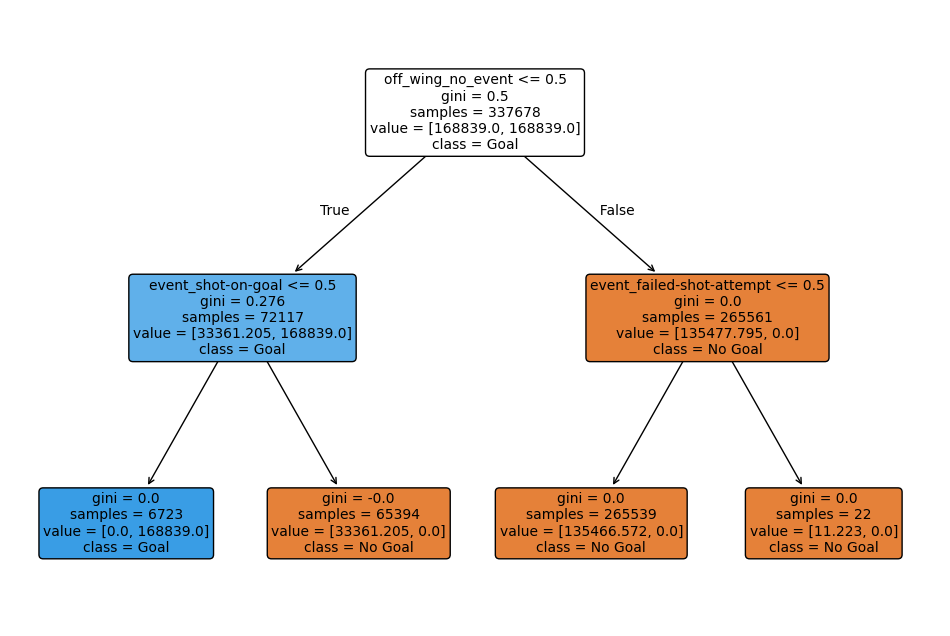

In [ ]:
# features
X = final_variables_df.drop(
    "event_goal", axis=1
)  # Features (all columns except target)

# target
y = final_variables_df["event_goal"]  # Target (the column you're trying to predict)

# splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.80, random_state=500
)


# Building the tree and gini

# clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 0)
# clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0, min_samples_split=10, min_samples_leaf=5)
from sklearn.utils.class_weight import compute_class_weight

# Automatically assign higher weight to the minority class
class_weights = compute_class_weight(
    "balanced", classes=np.array([0, 1]), y=final_variables_df["event_goal"]
)

clf_gini = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=0,
    class_weight="balanced",
)


clf_gini.fit(X_train, y_train)


# predict the test set results with the gini index

y_pred_gini = clf_gini.predict(X_test)


y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_gini,
    feature_names=X.columns,
    class_names=["No Goal", "Goal"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.show()


Accuracy: 1.0000


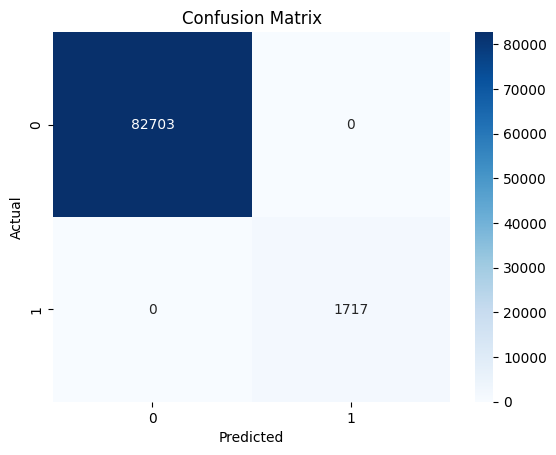

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     82703
        True       1.00      1.00      1.00      1717

    accuracy                           1.00     84420
   macro avg       1.00      1.00      1.00     84420
weighted avg       1.00      1.00      1.00     84420



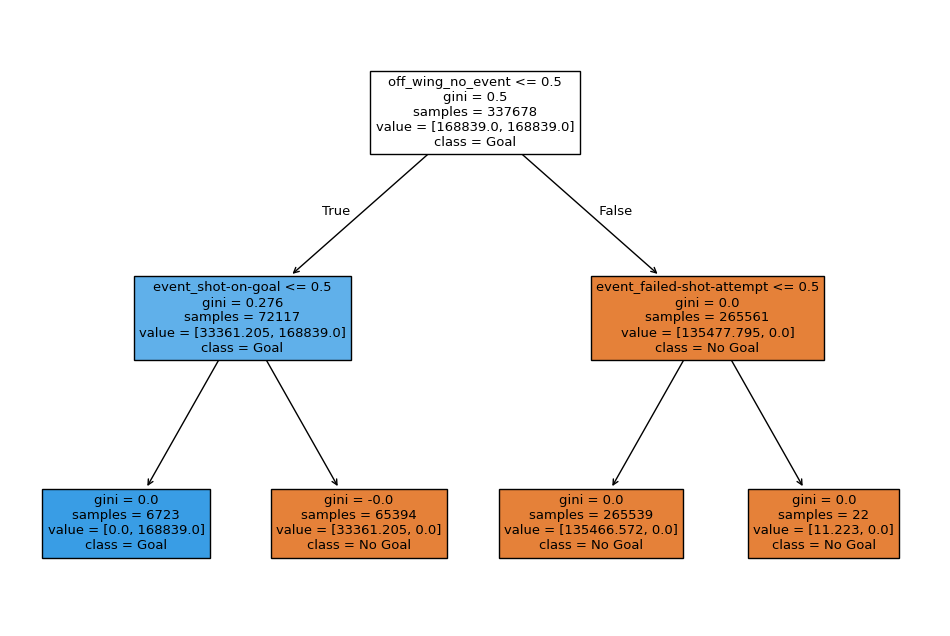

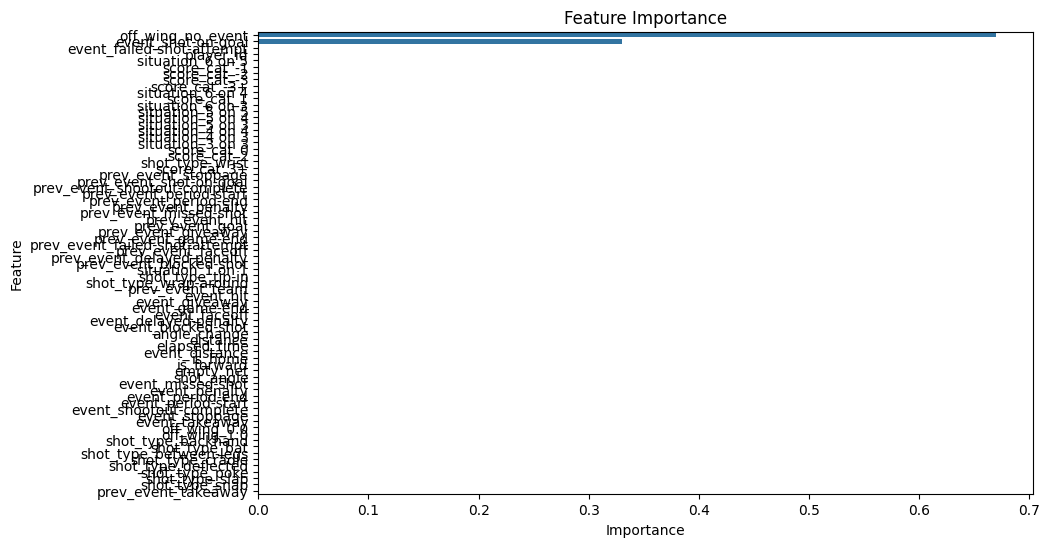

In [ ]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_gini))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_gini, feature_names=X.columns, class_names=["No Goal", "Goal"], filled=True
)
plt.show()

# Plot feature importance
feature_importances = clf_gini.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})

# Sort and plot
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()

In [ ]:
# calculate the accuracy score

print(
    "Model accuracy score with criterion gini index: {0:0.4f}".format(
        accuracy_score(y_test, y_pred_gini)
    )
)
print(
    "Training-set accuracy score: {0:0.4f}".format(
        accuracy_score(y_train, y_pred_train_gini)
    )
)

Model accuracy score with criterion gini index: 1.0000
Training-set accuracy score: 1.0000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate test set predictions
print("Test Set Performance")
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_gini):.4f}")

# Evaluate training set predictions
print("\nTraining Set Performance")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_gini):.4f}")


Test Set Performance
[[82703     0]
 [    0  1717]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     82703
        True       1.00      1.00      1.00      1717

    accuracy                           1.00     84420
   macro avg       1.00      1.00      1.00     84420
weighted avg       1.00      1.00      1.00     84420

Test Accuracy: 1.0000

Training Set Performance
Train Accuracy: 1.0000


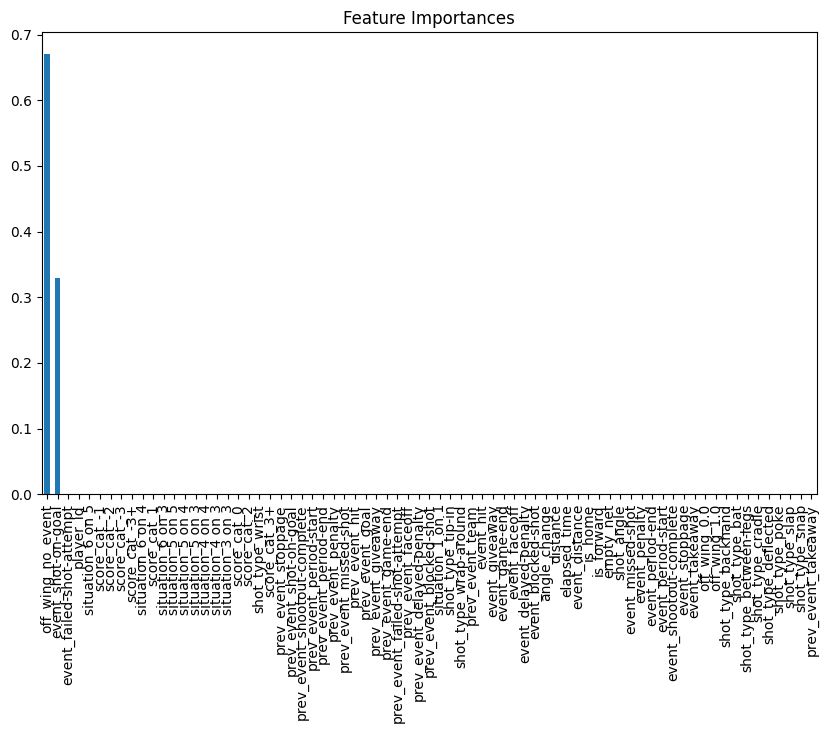

In [ ]:
feature_importances = pd.Series(clf_gini.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Feature Importances")
plt.show()
